# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# to write to csv file
import csv

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


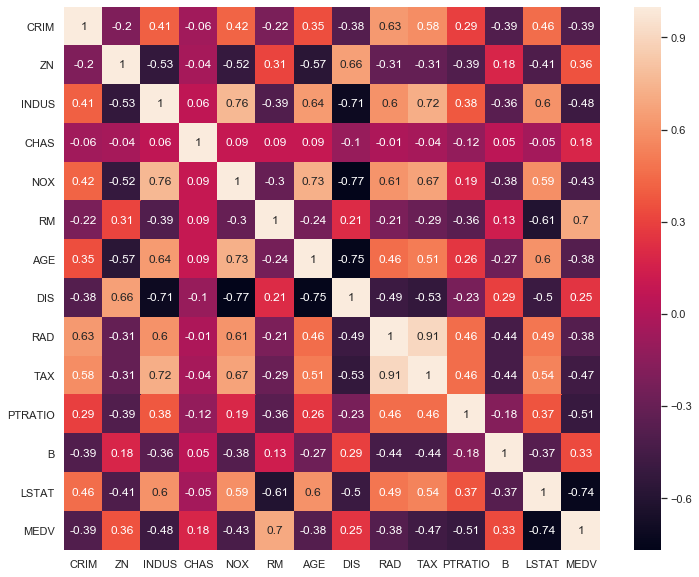

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

Because the TAX and RAD parameters are highly correlated (0.91) both should not be  used in training any model. As TAX has a higher correlation than RAD, the RAD feature will be dropped.

In [7]:
cm = cm.drop("RAD",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [8]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [9]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [10]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [11]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [12]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    # Train the network
    m.fit(x_train, y_train, epochs=noEpoch, batch_size=batchSize)
    return m

In [13]:
def doModel(model, epo, bs):
    global x_trian, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [14]:
# Headings for the data
results= []

In [24]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = True

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
#act = acts[5]

# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[2]

# model trial settings
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
scaling = True

if yesCreateModels == True:
    # Check for increasing no of attributes and all activations
    for act in acts:
        for noParams in range(1,12):
            # Create your inputs
            x = getInputs(noParams)
            # Scale if it is called for
            if scaling  == True:
                x_scaled = scaleDS(x)
            else:
                x_scaled = x
            # Split into training and testing data
            splitDS(x_scaled)
            # Create the model based on the paramters supplied
            m = createModel(act, opt)
            # Append the settings and final loss results after fitting and evaluating the model to the results file
            results.append([noParams, scaling, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Epoch 1/100
354/354 [==============================] - 0s 658us/step - loss: 566.3730
Epoch 2/100
354/354 [==============================] - 0s 110us/step - loss: 544.3599
Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 512.5601
Epoch 4/100
354/354 [==============================] - 0s 99us/step - loss: 468.3849
Epoch 5/100
354/354 [==============================] - 0s 99us/step - loss: 411.7814
Epoch 6/100
354/354 [==============================] - 0s 107us/step - loss: 345.9295
Epoch 7/100
354/354 [==============================] - 0s 99us/step - loss: 279.1073
Epoch 8/100
354/354 [==============================] - 0s 93us/step - loss: 214.4328
Epoch 9/100
354/354 [==============================] - 0s 93us/step - loss: 157.2233
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 110.8901
Epoch 11/100
354/354 [==============================] - 0s 96us/step - loss: 77.8382
Epoch 12/100
354/354 [==============================] - 0s 99

354/354 [==============================] - 0s 73us/step - loss: 30.2242
Epoch 98/100
354/354 [==============================] - 0s 85us/step - loss: 30.2003
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 30.1946
Epoch 100/100
354/354 [==============================] - 0s 73us/step - loss: 30.1870
Epoch 1/100
354/354 [==============================] - 0s 70us/step - loss: 30.2661
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 30.1751
Epoch 3/100
354/354 [==============================] - 0s 85us/step - loss: 30.1405
Epoch 4/100
354/354 [==============================] - 0s 65us/step - loss: 30.1829
Epoch 5/100
354/354 [==============================] - 0s 70us/step - loss: 30.1937
Epoch 6/100
354/354 [==============================] - 0s 104us/step - loss: 30.1481
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 30.2001
Epoch 8/100
354/354 [==============================] - 0s 93us/step - loss: 30.0766

354/354 [==============================] - 0s 70us/step - loss: 28.8145
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 28.7590
Epoch 95/100
354/354 [==============================] - 0s 65us/step - loss: 28.8342
Epoch 96/100
354/354 [==============================] - 0s 96us/step - loss: 28.6912
Epoch 97/100
354/354 [==============================] - 0s 79us/step - loss: 28.7162
Epoch 98/100
354/354 [==============================] - 0s 73us/step - loss: 28.6860
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 28.6835
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 605us/step - loss: 562.2311
Epoch 2/100
354/354 [==============================] - 0s 87us/step - loss: 533.0150
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 493.9923
Epoch 4/100
354/354 [==============================] - 0s 76us/step - loss: 443.3506
Epoch 

354/354 [==============================] - 0s 82us/step - loss: 20.8345
Epoch 89/100
354/354 [==============================] - 0s 79us/step - loss: 20.8039
Epoch 90/100
354/354 [==============================] - 0s 99us/step - loss: 20.7659
Epoch 91/100
354/354 [==============================] - 0s 79us/step - loss: 20.7498
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 20.7451
Epoch 93/100
354/354 [==============================] - 0s 76us/step - loss: 20.7316
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 20.7377
Epoch 95/100
354/354 [==============================] - 0s 73us/step - loss: 20.7251
Epoch 96/100
354/354 [==============================] - 0s 79us/step - loss: 20.8387
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 20.6914
Epoch 98/100
354/354 [==============================] - 0s 79us/step - loss: 20.6896
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 82us/step - loss: 20.2967
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 20.3409
Epoch 86/100
354/354 [==============================] - 0s 85us/step - loss: 20.2542
Epoch 87/100
354/354 [==============================] - 0s 87us/step - loss: 20.2569
Epoch 88/100
354/354 [==============================] - 0s 95us/step - loss: 20.2280
Epoch 89/100
354/354 [==============================] - 0s 73us/step - loss: 20.2865
Epoch 90/100
354/354 [==============================] - 0s 79us/step - loss: 20.3269
Epoch 91/100
354/354 [==============================] - 0s 82us/step - loss: 20.2762
Epoch 92/100
354/354 [==============================] - 0s 79us/step - loss: 20.1983
Epoch 93/100
354/354 [==============================] - 0s 87us/step - loss: 20.1854
Epoch 94/100
354/354 [==============================] - 0s 76us/step - loss: 20.2378
Epoch 95/100
354/354 [==============================] - 0s 85us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 16.8101
Epoch 80/100
354/354 [==============================] - 0s 68us/step - loss: 16.7899
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 16.7406
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 16.6781
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 16.6185
Epoch 84/100
354/354 [==============================] - 0s 76us/step - loss: 16.5745
Epoch 85/100
354/354 [==============================] - 0s 70us/step - loss: 16.5430
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 16.5578
Epoch 87/100
354/354 [==============================] - 0s 73us/step - loss: 16.4618
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 16.4123
Epoch 89/100
354/354 [==============================] - 0s 99us/step - loss: 16.3600
Epoch 90/100
354/354 [==============================] - 0s 116us/step - loss: 

354/354 [==============================] - 0s 96us/step - loss: 15.3298
Epoch 76/100
354/354 [==============================] - 0s 101us/step - loss: 15.3230
Epoch 77/100
354/354 [==============================] - 0s 93us/step - loss: 15.2492
Epoch 78/100
354/354 [==============================] - 0s 79us/step - loss: 15.2893
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 15.2324
Epoch 80/100
354/354 [==============================] - 0s 101us/step - loss: 15.3215
Epoch 81/100
354/354 [==============================] - 0s 93us/step - loss: 15.2660
Epoch 82/100
354/354 [==============================] - 0s 93us/step - loss: 15.2536
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 15.2894
Epoch 84/100
354/354 [==============================] - 0s 85us/step - loss: 15.2473
Epoch 85/100
354/354 [==============================] - 0s 85us/step - loss: 15.2564
Epoch 86/100
354/354 [==============================] - 0s 113us/step - loss

354/354 [==============================] - 0s 99us/step - loss: 18.4196
Epoch 71/100
354/354 [==============================] - 0s 130us/step - loss: 18.3636
Epoch 72/100
354/354 [==============================] - 0s 107us/step - loss: 18.3560
Epoch 73/100
354/354 [==============================] - 0s 144us/step - loss: 18.3278
Epoch 74/100
354/354 [==============================] - 0s 97us/step - loss: 18.2371
Epoch 75/100
354/354 [==============================] - 0s 79us/step - loss: 18.2173
Epoch 76/100
354/354 [==============================] - 0s 96us/step - loss: 18.0917
Epoch 77/100
354/354 [==============================] - 0s 82us/step - loss: 18.0714
Epoch 78/100
354/354 [==============================] - 0s 85us/step - loss: 18.0145
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 17.9458
Epoch 80/100
354/354 [==============================] - 0s 118us/step - loss: 17.9620
Epoch 81/100
354/354 [==============================] - 0s 130us/step - lo

354/354 [==============================] - 0s 90us/step - loss: 15.5599
Epoch 67/100
354/354 [==============================] - 0s 93us/step - loss: 15.4844
Epoch 68/100
354/354 [==============================] - 0s 82us/step - loss: 15.4873
Epoch 69/100
354/354 [==============================] - 0s 85us/step - loss: 15.4597
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 15.5570
Epoch 71/100
354/354 [==============================] - 0s 99us/step - loss: 15.3997
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 15.4476
Epoch 73/100
354/354 [==============================] - 0s 85us/step - loss: 15.3808
Epoch 74/100
354/354 [==============================] - 0s 90us/step - loss: 15.3205
Epoch 75/100
354/354 [==============================] - 0s 99us/step - loss: 15.3680
Epoch 76/100
354/354 [==============================] - 0s 87us/step - loss: 15.2653
Epoch 77/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 101us/step - loss: 10.9628
Epoch 62/100
354/354 [==============================] - 0s 93us/step - loss: 10.9384
Epoch 63/100
354/354 [==============================] - 0s 90us/step - loss: 10.9372
Epoch 64/100
354/354 [==============================] - 0s 90us/step - loss: 10.9362
Epoch 65/100
354/354 [==============================] - 0s 93us/step - loss: 10.8495
Epoch 66/100
354/354 [==============================] - 0s 96us/step - loss: 10.8123
Epoch 67/100
354/354 [==============================] - 0s 104us/step - loss: 10.8306
Epoch 68/100
354/354 [==============================] - 0s 114us/step - loss: 10.7847
Epoch 69/100
354/354 [==============================] - 0s 96us/step - loss: 10.7561
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 10.7583
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 10.7593
Epoch 72/100
354/354 [==============================] - 0s 93us/step - loss

354/354 [==============================] - 0s 87us/step - loss: 9.6800
Epoch 58/100
354/354 [==============================] - 0s 90us/step - loss: 9.6077
Epoch 59/100
354/354 [==============================] - 0s 87us/step - loss: 9.6208
Epoch 60/100
354/354 [==============================] - 0s 101us/step - loss: 9.5724
Epoch 61/100
354/354 [==============================] - 0s 96us/step - loss: 9.6110
Epoch 62/100
354/354 [==============================] - 0s 96us/step - loss: 9.5989
Epoch 63/100
354/354 [==============================] - 0s 102us/step - loss: 9.5976
Epoch 64/100
354/354 [==============================] - 0s 87us/step - loss: 9.5446
Epoch 65/100
354/354 [==============================] - 0s 85us/step - loss: 9.5389
Epoch 66/100
354/354 [==============================] - 0s 93us/step - loss: 9.5427
Epoch 67/100
354/354 [==============================] - 0s 82us/step - loss: 9.4856
Epoch 68/100
354/354 [==============================] - 0s 82us/step - loss: 9.5305
Epo

354/354 [==============================] - 0s 93us/step - loss: 13.1589
Epoch 53/100
354/354 [==============================] - 0s 101us/step - loss: 13.1273
Epoch 54/100
354/354 [==============================] - 0s 110us/step - loss: 12.9881
Epoch 55/100
354/354 [==============================] - 0s 293us/step - loss: 12.9571
Epoch 56/100
354/354 [==============================] - 0s 127us/step - loss: 12.8546
Epoch 57/100
354/354 [==============================] - 0s 144us/step - loss: 12.8317
Epoch 58/100
354/354 [==============================] - 0s 104us/step - loss: 12.7193
Epoch 59/100
354/354 [==============================] - 0s 177us/step - loss: 12.6911
Epoch 60/100
354/354 [==============================] - 0s 180us/step - loss: 12.6147
Epoch 61/100
354/354 [==============================] - 0s 186us/step - loss: 12.5696
Epoch 62/100
354/354 [==============================] - 0s 155us/step - loss: 12.4786
Epoch 63/100
354/354 [==============================] - 0s 132us/ste

354/354 [==============================] - 0s 96us/step - loss: 9.4444
Epoch 49/100
354/354 [==============================] - 0s 101us/step - loss: 9.4484
Epoch 50/100
354/354 [==============================] - 0s 96us/step - loss: 9.3870
Epoch 51/100
354/354 [==============================] - 0s 101us/step - loss: 9.3265
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 9.3624
Epoch 53/100
354/354 [==============================] - 0s 90us/step - loss: 9.3451
Epoch 54/100
354/354 [==============================] - 0s 113us/step - loss: 9.2989
Epoch 55/100
354/354 [==============================] - 0s 107us/step - loss: 9.3310
Epoch 56/100
354/354 [==============================] - 0s 141us/step - loss: 9.2964
Epoch 57/100
354/354 [==============================] - 0s 127us/step - loss: 9.2788
Epoch 58/100
354/354 [==============================] - 0s 127us/step - loss: 9.2302
Epoch 59/100
354/354 [==============================] - 0s 149us/step - loss: 9.22

354/354 [==============================] - 0s 93us/step - loss: 17.3546
Epoch 45/100
354/354 [==============================] - 0s 101us/step - loss: 17.1261
Epoch 46/100
354/354 [==============================] - 0s 87us/step - loss: 16.9462
Epoch 47/100
354/354 [==============================] - 0s 90us/step - loss: 16.6964
Epoch 48/100
354/354 [==============================] - 0s 96us/step - loss: 16.5598
Epoch 49/100
354/354 [==============================] - 0s 85us/step - loss: 16.3840
Epoch 50/100
354/354 [==============================] - 0s 101us/step - loss: 16.2089
Epoch 51/100
354/354 [==============================] - 0s 90us/step - loss: 16.0312
Epoch 52/100
354/354 [==============================] - 0s 90us/step - loss: 15.8906
Epoch 53/100
354/354 [==============================] - 0s 87us/step - loss: 15.7879
Epoch 54/100
354/354 [==============================] - 0s 87us/step - loss: 15.6788
Epoch 55/100
354/354 [==============================] - 0s 96us/step - loss:

354/354 [==============================] - 0s 84us/step - loss: 11.9469
Epoch 41/100
354/354 [==============================] - 0s 90us/step - loss: 11.9177
Epoch 42/100
354/354 [==============================] - 0s 87us/step - loss: 11.8887
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 11.9064
Epoch 44/100
354/354 [==============================] - 0s 93us/step - loss: 11.8905
Epoch 45/100
354/354 [==============================] - 0s 90us/step - loss: 11.9374
Epoch 46/100
354/354 [==============================] - 0s 107us/step - loss: 11.8165
Epoch 47/100
354/354 [==============================] - 0s 101us/step - loss: 11.8120
Epoch 48/100
354/354 [==============================] - 0s 90us/step - loss: 11.7682
Epoch 49/100
354/354 [==============================] - 0s 96us/step - loss: 11.7544
Epoch 50/100
354/354 [==============================] - 0s 90us/step - loss: 11.7756
Epoch 51/100
354/354 [==============================] - 0s 99us/step - loss:

354/354 [==============================] - 0s 90us/step - loss: 18.8369
Epoch 36/100
354/354 [==============================] - 0s 134us/step - loss: 18.4102
Epoch 37/100
354/354 [==============================] - 0s 127us/step - loss: 18.0694
Epoch 38/100
354/354 [==============================] - 0s 130us/step - loss: 17.6995
Epoch 39/100
354/354 [==============================] - 0s 127us/step - loss: 17.3840
Epoch 40/100
354/354 [==============================] - 0s 140us/step - loss: 17.0607
Epoch 41/100
354/354 [==============================] - 0s 127us/step - loss: 16.7652
Epoch 42/100
354/354 [==============================] - 0s 118us/step - loss: 16.5002
Epoch 43/100
354/354 [==============================] - 0s 112us/step - loss: 16.2666
Epoch 44/100
354/354 [==============================] - 0s 101us/step - loss: 16.0450
Epoch 45/100
354/354 [==============================] - 0s 106us/step - loss: 15.7891
Epoch 46/100
354/354 [==============================] - 0s 101us/ste

354/354 [==============================] - 0s 85us/step - loss: 11.3894
Epoch 32/100
354/354 [==============================] - 0s 82us/step - loss: 11.3752
Epoch 33/100
354/354 [==============================] - 0s 101us/step - loss: 11.3724
Epoch 34/100
354/354 [==============================] - 0s 85us/step - loss: 11.3931
Epoch 35/100
354/354 [==============================] - 0s 84us/step - loss: 11.3341
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 11.3345
Epoch 37/100
354/354 [==============================] - 0s 99us/step - loss: 11.2914
Epoch 38/100
354/354 [==============================] - 0s 90us/step - loss: 11.2372
Epoch 39/100
354/354 [==============================] - 0s 82us/step - loss: 11.2336
Epoch 40/100
354/354 [==============================] - 0s 84us/step - loss: 11.2108
Epoch 41/100
354/354 [==============================] - 0s 96us/step - loss: 11.1903
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 

Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 23.2365
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 22.8652
Epoch 29/100
354/354 [==============================] - 0s 104us/step - loss: 22.6092
Epoch 30/100
354/354 [==============================] - 0s 90us/step - loss: 22.2881
Epoch 31/100
354/354 [==============================] - 0s 99us/step - loss: 22.0291
Epoch 32/100
354/354 [==============================] - 0s 87us/step - loss: 21.7221
Epoch 33/100
354/354 [==============================] - 0s 84us/step - loss: 21.4889
Epoch 34/100
354/354 [==============================] - 0s 90us/step - loss: 21.3203
Epoch 35/100
354/354 [==============================] - 0s 79us/step - loss: 21.0334
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 20.7754
Epoch 37/100
354/354 [==============================] - 0s 85us/step - loss: 20.5448
Epoch 38/100
354/354 [==============================] - 0s 82us/

354/354 [==============================] - 0s 79us/step - loss: 12.0918
Epoch 24/100
354/354 [==============================] - 0s 85us/step - loss: 12.0691
Epoch 25/100
354/354 [==============================] - 0s 96us/step - loss: 11.9328
Epoch 26/100
354/354 [==============================] - 0s 99us/step - loss: 11.8945
Epoch 27/100
354/354 [==============================] - 0s 93us/step - loss: 11.9687
Epoch 28/100
354/354 [==============================] - 0s 99us/step - loss: 11.7992
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 11.8118
Epoch 30/100
354/354 [==============================] - 0s 73us/step - loss: 11.6853
Epoch 31/100
354/354 [==============================] - 0s 96us/step - loss: 11.7063
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 11.6322
Epoch 33/100
354/354 [==============================] - 0s 96us/step - loss: 11.6048
Epoch 34/100
354/354 [==============================] - 0s 79us/step - loss: 1

354/354 [==============================] - 0s 87us/step - loss: 32.6164
Epoch 19/100
354/354 [==============================] - 0s 96us/step - loss: 30.7632
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 29.2338
Epoch 21/100
354/354 [==============================] - 0s 82us/step - loss: 28.1179
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 27.1089
Epoch 23/100
354/354 [==============================] - 0s 76us/step - loss: 26.2755
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 25.4697
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 24.8163
Epoch 26/100
354/354 [==============================] - 0s 93us/step - loss: 24.2039
Epoch 27/100
354/354 [==============================] - 0s 79us/step - loss: 23.5875
Epoch 28/100
354/354 [==============================] - 0s 82us/step - loss: 23.0304
Epoch 29/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 90us/step - loss: 9.8351
Epoch 15/100
354/354 [==============================] - 0s 87us/step - loss: 9.7775
Epoch 16/100
354/354 [==============================] - 0s 76us/step - loss: 9.7697
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 9.7579
Epoch 18/100
354/354 [==============================] - 0s 73us/step - loss: 9.7025
Epoch 19/100
354/354 [==============================] - 0s 82us/step - loss: 9.7018
Epoch 20/100
354/354 [==============================] - 0s 82us/step - loss: 9.6959
Epoch 21/100
354/354 [==============================] - 0s 79us/step - loss: 9.5870
Epoch 22/100
354/354 [==============================] - 0s 81us/step - loss: 9.5877
Epoch 23/100
354/354 [==============================] - 0s 107us/step - loss: 9.5514
Epoch 24/100
354/354 [==============================] - 0s 82us/step - loss: 9.5551
Epoch 25/100
354/354 [==============================] - 0s 82us/step - loss: 9.5143
Epoc

354/354 [==============================] - 0s 85us/step - loss: 84.0263
Epoch 11/100
354/354 [==============================] - 0s 87us/step - loss: 69.9629
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 59.3534
Epoch 13/100
354/354 [==============================] - 0s 85us/step - loss: 50.8870
Epoch 14/100
354/354 [==============================] - 0s 73us/step - loss: 43.9148
Epoch 15/100
354/354 [==============================] - 0s 70us/step - loss: 38.6665
Epoch 16/100
354/354 [==============================] - 0s 76us/step - loss: 34.8200
Epoch 17/100
354/354 [==============================] - 0s 90us/step - loss: 31.9394
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 29.8743
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 28.3291
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 27.1274
Epoch 21/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 93us/step - loss: 8.8536
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 8.8693
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 8.8423
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 8.7194
Epoch 10/100
354/354 [==============================] - 0s 73us/step - loss: 8.6594
Epoch 11/100
354/354 [==============================] - 0s 84us/step - loss: 8.7147
Epoch 12/100
354/354 [==============================] - 0s 82us/step - loss: 8.6189
Epoch 13/100
354/354 [==============================] - 0s 76us/step - loss: 8.6317
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 8.5185
Epoch 15/100
354/354 [==============================] - 0s 76us/step - loss: 8.4217
Epoch 16/100
354/354 [==============================] - 0s 73us/step - loss: 8.5232
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 8.4181
Epoch 18

Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 495.3534
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 446.7268
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 392.4858
Epoch 6/100
354/354 [==============================] - 0s 90us/step - loss: 336.3533
Epoch 7/100
354/354 [==============================] - 0s 82us/step - loss: 281.9486
Epoch 8/100
354/354 [==============================] - 0s 75us/step - loss: 231.6760
Epoch 9/100
354/354 [==============================] - 0s 76us/step - loss: 188.0545
Epoch 10/100
354/354 [==============================] - 0s 116us/step - loss: 152.0731
Epoch 11/100
354/354 [==============================] - 0s 84us/step - loss: 123.5894
Epoch 12/100
354/354 [==============================] - 0s 79us/step - loss: 101.9374
Epoch 13/100
354/354 [==============================] - 0s 87us/step - loss: 86.1652
Epoch 14/100
354/354 [==============================] - 0s 82

354/354 [==============================] - 0s 76us/step - loss: 34.6155
Epoch 100/100
354/354 [==============================] - 0s 93us/step - loss: 34.5107
Epoch 1/100
354/354 [==============================] - 0s 76us/step - loss: 34.4303
Epoch 2/100
354/354 [==============================] - 0s 87us/step - loss: 34.3818
Epoch 3/100
354/354 [==============================] - 0s 82us/step - loss: 34.2344
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 34.1897
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 34.0321
Epoch 6/100
354/354 [==============================] - 0s 79us/step - loss: 33.9466
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 33.9119
Epoch 8/100
354/354 [==============================] - 0s 90us/step - loss: 33.7976
Epoch 9/100
354/354 [==============================] - 0s 90us/step - loss: 33.7112
Epoch 10/100
354/354 [==============================] - 0s 99us/step - loss: 33.6481
E

354/354 [==============================] - 0s 79us/step - loss: 30.8394
Epoch 96/100
354/354 [==============================] - 0s 85us/step - loss: 30.7793
Epoch 97/100
354/354 [==============================] - 0s 85us/step - loss: 30.7782
Epoch 98/100
354/354 [==============================] - 0s 73us/step - loss: 30.6976
Epoch 99/100
354/354 [==============================] - 0s 73us/step - loss: 30.7500
Epoch 100/100
152/152 [==============================] - 0s 164us/step
Epoch 1/100
354/354 [==============================] - 0s 662us/step - loss: 590.3591
Epoch 2/100
354/354 [==============================] - 0s 96us/step - loss: 556.2470
Epoch 3/100
354/354 [==============================] - 0s 84us/step - loss: 515.7062
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 467.2747
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 413.0189
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 356.3497
Epoch 

354/354 [==============================] - 0s 70us/step - loss: 21.7064
Epoch 91/100
354/354 [==============================] - 0s 79us/step - loss: 21.4781
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 21.1757
Epoch 93/100
354/354 [==============================] - 0s 87us/step - loss: 20.9705
Epoch 94/100
354/354 [==============================] - 0s 90us/step - loss: 20.6966
Epoch 95/100
354/354 [==============================] - 0s 76us/step - loss: 20.4812
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 20.2313
Epoch 97/100
354/354 [==============================] - 0s 85us/step - loss: 20.0258
Epoch 98/100
354/354 [==============================] - 0s 82us/step - loss: 19.8076
Epoch 99/100
354/354 [==============================] - 0s 85us/step - loss: 19.5920
Epoch 100/100
354/354 [==============================] - 0s 85us/step - loss: 19.3928
Epoch 1/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 90us/step - loss: 15.1950
Epoch 87/100
354/354 [==============================] - 0s 76us/step - loss: 15.1686
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 15.2074
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 15.1605
Epoch 90/100
354/354 [==============================] - 0s 79us/step - loss: 15.1927
Epoch 91/100
354/354 [==============================] - 0s 76us/step - loss: 15.1938
Epoch 92/100
354/354 [==============================] - 0s 85us/step - loss: 15.1334
Epoch 93/100
354/354 [==============================] - 0s 93us/step - loss: 15.1297
Epoch 94/100
354/354 [==============================] - 0s 87us/step - loss: 15.1443
Epoch 95/100
354/354 [==============================] - 0s 70us/step - loss: 15.1566
Epoch 96/100
354/354 [==============================] - 0s 104us/step - loss: 15.1693
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 

354/354 [==============================] - 0s 73us/step - loss: 29.4219
Epoch 82/100
354/354 [==============================] - 0s 82us/step - loss: 29.2745
Epoch 83/100
354/354 [==============================] - 0s 92us/step - loss: 29.0173
Epoch 84/100
354/354 [==============================] - 0s 76us/step - loss: 28.8153
Epoch 85/100
354/354 [==============================] - 0s 70us/step - loss: 28.5823
Epoch 86/100
354/354 [==============================] - 0s 76us/step - loss: 28.3517
Epoch 87/100
354/354 [==============================] - 0s 73us/step - loss: 28.2192
Epoch 88/100
354/354 [==============================] - 0s 85us/step - loss: 28.0139
Epoch 89/100
354/354 [==============================] - 0s 76us/step - loss: 27.8090
Epoch 90/100
354/354 [==============================] - 0s 76us/step - loss: 27.6622
Epoch 91/100
354/354 [==============================] - 0s 85us/step - loss: 27.4846
Epoch 92/100
354/354 [==============================] - 0s 104us/step - loss: 

354/354 [==============================] - 0s 76us/step - loss: 18.5876
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 18.5335
Epoch 79/100
354/354 [==============================] - 0s 76us/step - loss: 18.5290
Epoch 80/100
354/354 [==============================] - 0s 82us/step - loss: 18.5184
Epoch 81/100
354/354 [==============================] - 0s 87us/step - loss: 18.4921
Epoch 82/100
354/354 [==============================] - 0s 82us/step - loss: 18.4664
Epoch 83/100
354/354 [==============================] - 0s 108us/step - loss: 18.3892
Epoch 84/100
354/354 [==============================] - 0s 93us/step - loss: 18.4119
Epoch 85/100
354/354 [==============================] - 0s 79us/step - loss: 18.3772
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 18.3241
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 18.3823
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 

354/354 [==============================] - 0s 79us/step - loss: 32.3670
Epoch 73/100
354/354 [==============================] - 0s 93us/step - loss: 32.1910
Epoch 74/100
354/354 [==============================] - 0s 84us/step - loss: 31.8529
Epoch 75/100
354/354 [==============================] - 0s 79us/step - loss: 31.6694
Epoch 76/100
354/354 [==============================] - 0s 87us/step - loss: 31.4231
Epoch 77/100
354/354 [==============================] - 0s 85us/step - loss: 31.2041
Epoch 78/100
354/354 [==============================] - 0s 82us/step - loss: 30.9000
Epoch 79/100
354/354 [==============================] - 0s 79us/step - loss: 30.6649
Epoch 80/100
354/354 [==============================] - 0s 99us/step - loss: 30.5163
Epoch 81/100
354/354 [==============================] - 0s 73us/step - loss: 30.2269
Epoch 82/100
354/354 [==============================] - 0s 85us/step - loss: 29.9743
Epoch 83/100
354/354 [==============================] - 0s 82us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 18.8010
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 18.8373
Epoch 70/100
354/354 [==============================] - 0s 76us/step - loss: 18.7808
Epoch 71/100
354/354 [==============================] - 0s 110us/step - loss: 18.7447
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 18.6267
Epoch 73/100
354/354 [==============================] - 0s 90us/step - loss: 18.6886
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 18.5444
Epoch 75/100
354/354 [==============================] - 0s 87us/step - loss: 18.6006
Epoch 76/100
354/354 [==============================] - 0s 90us/step - loss: 18.5060
Epoch 77/100
354/354 [==============================] - 0s 70us/step - loss: 18.4717
Epoch 78/100
354/354 [==============================] - 0s 76us/step - loss: 18.4357
Epoch 79/100
354/354 [==============================] - 0s 70us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 30.8434
Epoch 64/100
354/354 [==============================] - 0s 82us/step - loss: 30.5774
Epoch 65/100
354/354 [==============================] - 0s 76us/step - loss: 30.3045
Epoch 66/100
354/354 [==============================] - 0s 79us/step - loss: 30.0982
Epoch 67/100
354/354 [==============================] - 0s 73us/step - loss: 29.9017
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 29.6838
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 29.4838
Epoch 70/100
354/354 [==============================] - 0s 79us/step - loss: 29.2741
Epoch 71/100
354/354 [==============================] - 0s 73us/step - loss: 29.0476
Epoch 72/100
354/354 [==============================] - 0s 76us/step - loss: 28.7968
Epoch 73/100
354/354 [==============================] - 0s 85us/step - loss: 28.6675
Epoch 74/100
354/354 [==============================] - 0s 104us/step - loss: 

354/354 [==============================] - 0s 76us/step - loss: 17.7255
Epoch 60/100
354/354 [==============================] - 0s 85us/step - loss: 17.7554
Epoch 61/100
354/354 [==============================] - 0s 79us/step - loss: 17.5947
Epoch 62/100
354/354 [==============================] - 0s 82us/step - loss: 17.5602
Epoch 63/100
354/354 [==============================] - ETA: 0s - loss: 25.44 - 0s 82us/step - loss: 17.4755
Epoch 64/100
354/354 [==============================] - 0s 70us/step - loss: 17.4763
Epoch 65/100
354/354 [==============================] - 0s 79us/step - loss: 17.4193
Epoch 66/100
354/354 [==============================] - 0s 82us/step - loss: 17.3336
Epoch 67/100
354/354 [==============================] - 0s 85us/step - loss: 17.2398
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 17.2119
Epoch 69/100
354/354 [==============================] - 0s 79us/step - loss: 17.1401
Epoch 70/100
354/354 [==============================] 

354/354 [==============================] - 0s 90us/step - loss: 30.1998
Epoch 55/100
354/354 [==============================] - 0s 110us/step - loss: 29.8999
Epoch 56/100
354/354 [==============================] - 0s 76us/step - loss: 29.5939
Epoch 57/100
354/354 [==============================] - 0s 79us/step - loss: 29.3673
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: 29.1234
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 28.8402
Epoch 60/100
354/354 [==============================] - 0s 76us/step - loss: 28.6231
Epoch 61/100
354/354 [==============================] - 0s 87us/step - loss: 28.4595
Epoch 62/100
354/354 [==============================] - 0s 73us/step - loss: 28.1285
Epoch 63/100
354/354 [==============================] - 0s 85us/step - loss: 27.9005
Epoch 64/100
354/354 [==============================] - 0s 76us/step - loss: 27.7417
Epoch 65/100
354/354 [==============================] - 0s 76us/step - loss: 

354/354 [==============================] - 0s 73us/step - loss: 15.9869
Epoch 51/100
354/354 [==============================] - 0s 76us/step - loss: 15.9590
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 15.8846
Epoch 53/100
354/354 [==============================] - 0s 76us/step - loss: 15.8178
Epoch 54/100
354/354 [==============================] - 0s 79us/step - loss: 15.7665
Epoch 55/100
354/354 [==============================] - 0s 107us/step - loss: 15.6827
Epoch 56/100
354/354 [==============================] - 0s 76us/step - loss: 15.7032
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 15.7012
Epoch 58/100
354/354 [==============================] - 0s 73us/step - loss: 15.5212
Epoch 59/100
354/354 [==============================] - 0s 73us/step - loss: 15.4620
Epoch 60/100
354/354 [==============================] - 0s 79us/step - loss: 15.3493
Epoch 61/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 29.9393
Epoch 46/100
354/354 [==============================] - 0s 82us/step - loss: 29.6045
Epoch 47/100
354/354 [==============================] - 0s 85us/step - loss: 29.1691
Epoch 48/100
354/354 [==============================] - 0s 82us/step - loss: 28.6957
Epoch 49/100
354/354 [==============================] - 0s 85us/step - loss: 28.3533
Epoch 50/100
354/354 [==============================] - 0s 85us/step - loss: 27.8957
Epoch 51/100
354/354 [==============================] - 0s 76us/step - loss: 27.4540
Epoch 52/100
354/354 [==============================] - 0s 90us/step - loss: 27.0970
Epoch 53/100
354/354 [==============================] - 0s 87us/step - loss: 26.7091
Epoch 54/100
354/354 [==============================] - 0s 91us/step - loss: 26.4110
Epoch 55/100
354/354 [==============================] - 0s 82us/step - loss: 26.0422
Epoch 56/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 99us/step - loss: 12.1767
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 12.1001
Epoch 43/100
354/354 [==============================] - 0s 79us/step - loss: 12.0374
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 12.0505
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 11.9385
Epoch 46/100
354/354 [==============================] - 0s 85us/step - loss: 11.8541
Epoch 47/100
354/354 [==============================] - 0s 85us/step - loss: 11.8267
Epoch 48/100
354/354 [==============================] - 0s 78us/step - loss: 11.7471
Epoch 49/100
354/354 [==============================] - 0s 93us/step - loss: 11.7355
Epoch 50/100
354/354 [==============================] - 0s 113us/step - loss: 11.6163
Epoch 51/100
354/354 [==============================] - 0s 118us/step - loss: 11.5382
Epoch 52/100
354/354 [==============================] - 0s 135us/step - loss

354/354 [==============================] - 0s 73us/step - loss: 34.4003
Epoch 37/100
354/354 [==============================] - 0s 73us/step - loss: 33.9296
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 33.5012
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 33.0972
Epoch 40/100
354/354 [==============================] - 0s 79us/step - loss: 32.6818
Epoch 41/100
354/354 [==============================] - 0s 73us/step - loss: 32.2871
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 31.9181
Epoch 43/100
354/354 [==============================] - 0s 79us/step - loss: 31.5116
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 31.2017
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 30.8447
Epoch 46/100
354/354 [==============================] - 0s 73us/step - loss: 30.4559
Epoch 47/100
354/354 [==============================] - 0s 99us/step - loss: 3

354/354 [==============================] - 0s 90us/step - loss: 15.4219
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 15.2501
Epoch 34/100
354/354 [==============================] - 0s 90us/step - loss: 15.1566
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 15.0712
Epoch 36/100
354/354 [==============================] - 0s 85us/step - loss: 15.0268
Epoch 37/100
354/354 [==============================] - 0s 104us/step - loss: 14.9690
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 15.0840
Epoch 39/100
354/354 [==============================] - 0s 73us/step - loss: 14.7865
Epoch 40/100
354/354 [==============================] - 0s 89us/step - loss: 14.7071
Epoch 41/100
354/354 [==============================] - 0s 107us/step - loss: 14.6420
Epoch 42/100
354/354 [==============================] - 0s 114us/step - loss: 14.5613
Epoch 43/100
354/354 [==============================] - 0s 138us/step - los

354/354 [==============================] - 0s 79us/step - loss: 41.1820
Epoch 28/100
354/354 [==============================] - 0s 87us/step - loss: 40.5074
Epoch 29/100
354/354 [==============================] - 0s 82us/step - loss: 39.9670
Epoch 30/100
354/354 [==============================] - 0s 84us/step - loss: 39.2343
Epoch 31/100
354/354 [==============================] - 0s 85us/step - loss: 38.5991
Epoch 32/100
354/354 [==============================] - 0s 93us/step - loss: 38.0620
Epoch 33/100
354/354 [==============================] - 0s 99us/step - loss: 37.3485
Epoch 34/100
354/354 [==============================] - 0s 99us/step - loss: 36.7208
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 36.0994
Epoch 36/100
354/354 [==============================] - 0s 110us/step - loss: 35.4697
Epoch 37/100
354/354 [==============================] - 0s 116us/step - loss: 34.8442
Epoch 38/100
354/354 [==============================] - 0s 118us/step - loss

354/354 [==============================] - 0s 90us/step - loss: 12.5822
Epoch 24/100
354/354 [==============================] - 0s 89us/step - loss: 12.4031
Epoch 25/100
354/354 [==============================] - 0s 87us/step - loss: 12.3674
Epoch 26/100
354/354 [==============================] - 0s 85us/step - loss: 12.3507
Epoch 27/100
354/354 [==============================] - 0s 92us/step - loss: 12.1703
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 12.0830
Epoch 29/100
354/354 [==============================] - 0s 85us/step - loss: 12.0309
Epoch 30/100
354/354 [==============================] - 0s 91us/step - loss: 11.9262
Epoch 31/100
354/354 [==============================] - 0s 85us/step - loss: 11.9265
Epoch 32/100
354/354 [==============================] - 0s 93us/step - loss: 11.8564
Epoch 33/100
354/354 [==============================] - 0s 76us/step - loss: 11.7579
Epoch 34/100
354/354 [==============================] - 0s 84us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 66.4056
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 61.4757
Epoch 20/100
354/354 [==============================] - 0s 87us/step - loss: 57.4167
Epoch 21/100
354/354 [==============================] - 0s 90us/step - loss: 53.9756
Epoch 22/100
354/354 [==============================] - 0s 85us/step - loss: 51.0859
Epoch 23/100
354/354 [==============================] - 0s 90us/step - loss: 48.5816
Epoch 24/100
354/354 [==============================] - 0s 87us/step - loss: 46.3551
Epoch 25/100
354/354 [==============================] - 0s 85us/step - loss: 44.5418
Epoch 26/100
354/354 [==============================] - 0s 82us/step - loss: 43.0017
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 41.7568
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 40.5966
Epoch 29/100
354/354 [==============================] - 0s 73us/step - loss: 3

354/354 [==============================] - 0s 85us/step - loss: 15.5724
Epoch 15/100
354/354 [==============================] - 0s 73us/step - loss: 15.3276
Epoch 16/100
354/354 [==============================] - 0s 90us/step - loss: 15.3142
Epoch 17/100
354/354 [==============================] - 0s 82us/step - loss: 15.1608
Epoch 18/100
354/354 [==============================] - 0s 76us/step - loss: 15.0875
Epoch 19/100
354/354 [==============================] - 0s 82us/step - loss: 14.9437
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 14.8313
Epoch 21/100
354/354 [==============================] - 0s 118us/step - loss: 14.7269
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 14.6874
Epoch 23/100
354/354 [==============================] - 0s 79us/step - loss: 14.5049
Epoch 24/100
354/354 [==============================] - 0s 93us/step - loss: 14.5153
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 79us/step - loss: 190.0439
Epoch 11/100
354/354 [==============================] - 0s 82us/step - loss: 155.5737
Epoch 12/100
354/354 [==============================] - 0s 73us/step - loss: 128.0373
Epoch 13/100
354/354 [==============================] - 0s 87us/step - loss: 106.4669
Epoch 14/100
354/354 [==============================] - 0s 93us/step - loss: 89.7496
Epoch 15/100
354/354 [==============================] - 0s 76us/step - loss: 77.3933
Epoch 16/100
354/354 [==============================] - 0s 87us/step - loss: 68.1270
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 61.0520
Epoch 18/100
354/354 [==============================] - 0s 79us/step - loss: 55.6330
Epoch 19/100
354/354 [==============================] - 0s 82us/step - loss: 51.5924
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 48.5669
Epoch 21/100
354/354 [==============================] - 0s 85us/step - los

354/354 [==============================] - 0s 79us/step - loss: 13.4053
Epoch 7/100
354/354 [==============================] - 0s 90us/step - loss: 13.3190
Epoch 8/100
354/354 [==============================] - 0s 79us/step - loss: 13.2414
Epoch 9/100
354/354 [==============================] - 0s 82us/step - loss: 13.1009
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 12.9432
Epoch 11/100
354/354 [==============================] - 0s 82us/step - loss: 12.8940
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 12.7882
Epoch 13/100
354/354 [==============================] - 0s 79us/step - loss: 12.6662
Epoch 14/100
354/354 [==============================] - 0s 90us/step - loss: 12.5749
Epoch 15/100
354/354 [==============================] - 0s 93us/step - loss: 12.4314
Epoch 16/100
354/354 [==============================] - 0s 87us/step - loss: 12.2618
Epoch 17/100
354/354 [==============================] - 0s 82us/step - loss: 12.3

354/354 [==============================] - 0s 73us/step - loss: 496.6541
Epoch 3/100
354/354 [==============================] - 0s 99us/step - loss: 460.7158
Epoch 4/100
354/354 [==============================] - 0s 90us/step - loss: 425.0463
Epoch 5/100
354/354 [==============================] - 0s 93us/step - loss: 389.7172
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 354.7065
Epoch 7/100
354/354 [==============================] - 0s 82us/step - loss: 320.3438
Epoch 8/100
354/354 [==============================] - 0s 82us/step - loss: 287.3712
Epoch 9/100
354/354 [==============================] - 0s 85us/step - loss: 255.9902
Epoch 10/100
354/354 [==============================] - 0s 85us/step - loss: 226.9377
Epoch 11/100
354/354 [==============================] - 0s 90us/step - loss: 200.1521
Epoch 12/100
354/354 [==============================] - 0s 90us/step - loss: 176.0945
Epoch 13/100
354/354 [==============================] - 0s 82us/step - los

354/354 [==============================] - 0s 73us/step - loss: 33.8766
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 33.7599
Epoch 100/100
354/354 [==============================] - 0s 82us/step - loss: 33.6697
Epoch 1/100
354/354 [==============================] - 0s 76us/step - loss: 33.5657
Epoch 2/100
354/354 [==============================] - 0s 73us/step - loss: 33.5190
Epoch 3/100
354/354 [==============================] - 0s 76us/step - loss: 33.3734
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 33.3027
Epoch 5/100
354/354 [==============================] - 0s 76us/step - loss: 33.2044
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 33.1499
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 33.0777
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 32.9839
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 32.8987
E

354/354 [==============================] - 0s 166us/step - loss: 29.3392
Epoch 95/100
354/354 [==============================] - 0s 144us/step - loss: 29.3217
Epoch 96/100
354/354 [==============================] - 0s 118us/step - loss: 29.2923
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 29.3261
Epoch 98/100
354/354 [==============================] - 0s 93us/step - loss: 29.2371
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 29.2145
Epoch 100/100
152/152 [==============================] - 0s 164us/step
Epoch 1/100
354/354 [==============================] - 0s 693us/step - loss: 617.8399
Epoch 2/100
354/354 [==============================] - 0s 93us/step - loss: 578.3459
Epoch 3/100
354/354 [==============================] - 0s 87us/step - loss: 540.1451
Epoch 4/100
354/354 [==============================] - 0s 84us/step - loss: 503.3759
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 467.4257
Epo

354/354 [==============================] - 0s 124us/step - loss: 22.4913
Epoch 90/100
354/354 [==============================] - 0s 96us/step - loss: 22.2703
Epoch 91/100
354/354 [==============================] - 0s 110us/step - loss: 22.0834
Epoch 92/100
354/354 [==============================] - 0s 87us/step - loss: 21.8630
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 21.6833
Epoch 94/100
354/354 [==============================] - 0s 99us/step - loss: 21.4919
Epoch 95/100
354/354 [==============================] - 0s 90us/step - loss: 21.2867
Epoch 96/100
354/354 [==============================] - 0s 93us/step - loss: 21.1028
Epoch 97/100
354/354 [==============================] - 0s 76us/step - loss: 20.9215
Epoch 98/100
354/354 [==============================] - 0s 87us/step - loss: 20.7577
Epoch 99/100
354/354 [==============================] - 0s 110us/step - loss: 20.5857
Epoch 100/100
354/354 [==============================] - 0s 99us/step - los

354/354 [==============================] - 0s 76us/step - loss: 14.3400
Epoch 86/100
354/354 [==============================] - 0s 73us/step - loss: 14.2907
Epoch 87/100
354/354 [==============================] - 0s 73us/step - loss: 14.2553
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 14.2434
Epoch 89/100
354/354 [==============================] - 0s 76us/step - loss: 14.2272
Epoch 90/100
354/354 [==============================] - 0s 99us/step - loss: 14.1921
Epoch 91/100
354/354 [==============================] - 0s 82us/step - loss: 14.1908
Epoch 92/100
354/354 [==============================] - 0s 99us/step - loss: 14.1698
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 14.1490
Epoch 94/100
354/354 [==============================] - 0s 87us/step - loss: 14.1439
Epoch 95/100
354/354 [==============================] - 0s 115us/step - loss: 14.1380
Epoch 96/100
354/354 [==============================] - 0s 87us/step - loss: 

354/354 [==============================] - 0s 85us/step - loss: 30.0658
Epoch 81/100
354/354 [==============================] - 0s 90us/step - loss: 29.8540
Epoch 82/100
354/354 [==============================] - 0s 85us/step - loss: 29.6072
Epoch 83/100
354/354 [==============================] - 0s 82us/step - loss: 29.3709
Epoch 84/100
354/354 [==============================] - 0s 87us/step - loss: 29.1331
Epoch 85/100
354/354 [==============================] - 0s 93us/step - loss: 28.8875
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 28.6641
Epoch 87/100
354/354 [==============================] - 0s 85us/step - loss: 28.4131
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 28.2026
Epoch 89/100
354/354 [==============================] - 0s 93us/step - loss: 28.0196
Epoch 90/100
354/354 [==============================] - 0s 78us/step - loss: 27.7630
Epoch 91/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 18.6650
Epoch 77/100
354/354 [==============================] - 0s 85us/step - loss: 18.6301
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 18.5945
Epoch 79/100
354/354 [==============================] - 0s 101us/step - loss: 18.5750
Epoch 80/100
354/354 [==============================] - 0s 79us/step - loss: 18.5192
Epoch 81/100
354/354 [==============================] - 0s 78us/step - loss: 18.4862
Epoch 82/100
354/354 [==============================] - 0s 79us/step - loss: 18.4832
Epoch 83/100
354/354 [==============================] - 0s 96us/step - loss: 18.4460
Epoch 84/100
354/354 [==============================] - 0s 82us/step - loss: 18.4021
Epoch 85/100
354/354 [==============================] - 0s 82us/step - loss: 18.3511
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 18.3509
Epoch 87/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 30.1465
Epoch 72/100
354/354 [==============================] - 0s 87us/step - loss: 29.8700
Epoch 73/100
354/354 [==============================] - 0s 82us/step - loss: 29.5642
Epoch 74/100
354/354 [==============================] - 0s 94us/step - loss: 29.2718
Epoch 75/100
354/354 [==============================] - 0s 71us/step - loss: 28.9838
Epoch 76/100
354/354 [==============================] - 0s 93us/step - loss: 28.7011
Epoch 77/100
354/354 [==============================] - 0s 88us/step - loss: 28.3953
Epoch 78/100
354/354 [==============================] - 0s 73us/step - loss: 28.1370
Epoch 79/100
354/354 [==============================] - 0s 79us/step - loss: 27.8606
Epoch 80/100
354/354 [==============================] - 0s 85us/step - loss: 27.6049
Epoch 81/100
354/354 [==============================] - 0s 83us/step - loss: 27.3372
Epoch 82/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 16.2855
Epoch 68/100
354/354 [==============================] - 0s 73us/step - loss: 16.2421
Epoch 69/100
354/354 [==============================] - 0s 73us/step - loss: 16.2020
Epoch 70/100
354/354 [==============================] - 0s 73us/step - loss: 16.1387
Epoch 71/100
354/354 [==============================] - 0s 99us/step - loss: 16.1019
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 16.0309
Epoch 73/100
354/354 [==============================] - 0s 79us/step - loss: 15.9964
Epoch 74/100
354/354 [==============================] - 0s 73us/step - loss: 15.9708
Epoch 75/100
354/354 [==============================] - 0s 75us/step - loss: 15.9151
Epoch 76/100
354/354 [==============================] - 0s 73us/step - loss: 15.8950
Epoch 77/100
354/354 [==============================] - 0s 79us/step - loss: 15.8711
Epoch 78/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 32.4401
Epoch 63/100
354/354 [==============================] - 0s 79us/step - loss: 32.1705
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 31.9103
Epoch 65/100
354/354 [==============================] - 0s 70us/step - loss: 31.6176
Epoch 66/100
354/354 [==============================] - 0s 90us/step - loss: 31.3548
Epoch 67/100
354/354 [==============================] - 0s 96us/step - loss: 31.0778
Epoch 68/100
354/354 [==============================] - 0s 76us/step - loss: 30.8012
Epoch 69/100
354/354 [==============================] - 0s 101us/step - loss: 30.5705
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 30.2749
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 29.9921
Epoch 72/100
354/354 [==============================] - 0s 96us/step - loss: 29.7542
Epoch 73/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 99us/step - loss: 16.9991
Epoch 59/100
354/354 [==============================] - 0s 87us/step - loss: 16.9150
Epoch 60/100
354/354 [==============================] - 0s 76us/step - loss: 16.9244
Epoch 61/100
354/354 [==============================] - 0s 87us/step - loss: 16.7850
Epoch 62/100
354/354 [==============================] - 0s 85us/step - loss: 16.7252
Epoch 63/100
354/354 [==============================] - 0s 93us/step - loss: 16.6877
Epoch 64/100
354/354 [==============================] - 0s 90us/step - loss: 16.6360
Epoch 65/100
354/354 [==============================] - 0s 84us/step - loss: 16.5524
Epoch 66/100
354/354 [==============================] - 0s 76us/step - loss: 16.4823
Epoch 67/100
354/354 [==============================] - 0s 90us/step - loss: 16.4606
Epoch 68/100
354/354 [==============================] - 0s 79us/step - loss: 16.3917
Epoch 69/100
354/354 [==============================] - 0s 87us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 35.4634
Epoch 54/100
354/354 [==============================] - 0s 82us/step - loss: 35.1511
Epoch 55/100
354/354 [==============================] - 0s 96us/step - loss: 34.8066
Epoch 56/100
354/354 [==============================] - 0s 93us/step - loss: 34.4816
Epoch 57/100
354/354 [==============================] - 0s 76us/step - loss: 34.1900
Epoch 58/100
354/354 [==============================] - 0s 73us/step - loss: 33.8284
Epoch 59/100
354/354 [==============================] - 0s 79us/step - loss: 33.5029
Epoch 60/100
354/354 [==============================] - 0s 76us/step - loss: 33.1904
Epoch 61/100
354/354 [==============================] - 0s 82us/step - loss: 32.8551
Epoch 62/100
354/354 [==============================] - 0s 85us/step - loss: 32.5381
Epoch 63/100
354/354 [==============================] - 0s 76us/step - loss: 32.2097
Epoch 64/100
354/354 [==============================] - 0s 76us/step - loss: 3

354/354 [==============================] - 0s 87us/step - loss: 16.6148
Epoch 50/100
354/354 [==============================] - 0s 76us/step - loss: 16.5445
Epoch 51/100
354/354 [==============================] - 0s 74us/step - loss: 16.4894
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 16.4404
Epoch 53/100
354/354 [==============================] - 0s 96us/step - loss: 16.3678
Epoch 54/100
354/354 [==============================] - 0s 78us/step - loss: 16.3342
Epoch 55/100
354/354 [==============================] - 0s 79us/step - loss: 16.2833
Epoch 56/100
354/354 [==============================] - 0s 82us/step - loss: 16.2450
Epoch 57/100
354/354 [==============================] - 0s 82us/step - loss: 16.1846
Epoch 58/100
354/354 [==============================] - 0s 76us/step - loss: 16.1728
Epoch 59/100
354/354 [==============================] - 0s 79us/step - loss: 16.1238
Epoch 60/100
354/354 [==============================] - 0s 99us/step - loss: 1

354/354 [==============================] - 0s 76us/step - loss: 36.5840
Epoch 45/100
354/354 [==============================] - 0s 82us/step - loss: 36.3227
Epoch 46/100
354/354 [==============================] - 0s 76us/step - loss: 36.1239
Epoch 47/100
354/354 [==============================] - 0s 91us/step - loss: 35.8589
Epoch 48/100
354/354 [==============================] - 0s 90us/step - loss: 35.6378
Epoch 49/100
354/354 [==============================] - 0s 82us/step - loss: 35.3933
Epoch 50/100
354/354 [==============================] - 0s 85us/step - loss: 35.1271
Epoch 51/100
354/354 [==============================] - 0s 76us/step - loss: 34.8757
Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 34.6134
Epoch 53/100
354/354 [==============================] - 0s 70us/step - loss: 34.3273
Epoch 54/100
354/354 [==============================] - 0s 82us/step - loss: 34.0990
Epoch 55/100
354/354 [==============================] - 0s 79us/step - loss: 3

354/354 [==============================] - 0s 85us/step - loss: 17.6814
Epoch 41/100
354/354 [==============================] - 0s 86us/step - loss: 17.6096
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 17.5166
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 17.4264
Epoch 44/100
354/354 [==============================] - 0s 97us/step - loss: 17.3680
Epoch 45/100
354/354 [==============================] - 0s 82us/step - loss: 17.3007
Epoch 46/100
354/354 [==============================] - 0s 107us/step - loss: 17.1789
Epoch 47/100
354/354 [==============================] - 0s 76us/step - loss: 17.0795
Epoch 48/100
354/354 [==============================] - 0s 93us/step - loss: 16.9863
Epoch 49/100
354/354 [==============================] - 0s 85us/step - loss: 16.9169
Epoch 50/100
354/354 [==============================] - 0s 87us/step - loss: 16.8613
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 35.2097
Epoch 36/100
354/354 [==============================] - 0s 99us/step - loss: 34.9027
Epoch 37/100
354/354 [==============================] - 0s 85us/step - loss: 34.5976
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 34.3277
Epoch 39/100
354/354 [==============================] - 0s 87us/step - loss: 34.0852
Epoch 40/100
354/354 [==============================] - 0s 99us/step - loss: 33.7891
Epoch 41/100
354/354 [==============================] - 0s 85us/step - loss: 33.5410
Epoch 42/100
354/354 [==============================] - 0s 99us/step - loss: 33.3215
Epoch 43/100
354/354 [==============================] - 0s 90us/step - loss: 33.0986
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 32.8321
Epoch 45/100
354/354 [==============================] - 0s 82us/step - loss: 32.6276
Epoch 46/100
354/354 [==============================] - 0s 82us/step - loss: 3

354/354 [==============================] - 0s 82us/step - loss: 16.9502
Epoch 32/100
354/354 [==============================] - 0s 93us/step - loss: 16.8287
Epoch 33/100
354/354 [==============================] - 0s 85us/step - loss: 16.7230
Epoch 34/100
354/354 [==============================] - 0s 82us/step - loss: 16.6130
Epoch 35/100
354/354 [==============================] - 0s 79us/step - loss: 16.5113
Epoch 36/100
354/354 [==============================] - 0s 87us/step - loss: 16.3783
Epoch 37/100
354/354 [==============================] - 0s 99us/step - loss: 16.3171
Epoch 38/100
354/354 [==============================] - 0s 102us/step - loss: 16.2197
Epoch 39/100
354/354 [==============================] - 0s 82us/step - loss: 16.1235
Epoch 40/100
354/354 [==============================] - 0s 73us/step - loss: 16.0113
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 15.8981
Epoch 42/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 99us/step - loss: 45.7816
Epoch 27/100
354/354 [==============================] - 0s 113us/step - loss: 44.4455
Epoch 28/100
354/354 [==============================] - 0s 101us/step - loss: 43.4019
Epoch 29/100
354/354 [==============================] - 0s 104us/step - loss: 42.6219
Epoch 30/100
354/354 [==============================] - 0s 101us/step - loss: 41.9010
Epoch 31/100
354/354 [==============================] - 0s 93us/step - loss: 41.3145
Epoch 32/100
354/354 [==============================] - 0s 104us/step - loss: 40.7989
Epoch 33/100
354/354 [==============================] - 0s 96us/step - loss: 40.3779
Epoch 34/100
354/354 [==============================] - 0s 79us/step - loss: 39.9521
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 39.5626
Epoch 36/100
354/354 [==============================] - 0s 96us/step - loss: 39.1779
Epoch 37/100
354/354 [==============================] - 0s 85us/step - lo

354/354 [==============================] - 0s 76us/step - loss: 18.6897
Epoch 23/100
354/354 [==============================] - 0s 82us/step - loss: 18.5582
Epoch 24/100
354/354 [==============================] - 0s 82us/step - loss: 18.4604
Epoch 25/100
354/354 [==============================] - 0s 73us/step - loss: 18.3153
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 18.1831
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 18.0571
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 17.9394
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 17.8049
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 17.7398
Epoch 31/100
354/354 [==============================] - 0s 79us/step - loss: 17.5502
Epoch 32/100
354/354 [==============================] - 0s 76us/step - loss: 17.4914
Epoch 33/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 82us/step - loss: 101.6579
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 89.8816
Epoch 19/100
354/354 [==============================] - 0s 79us/step - loss: 80.3060
Epoch 20/100
354/354 [==============================] - 0s 76us/step - loss: 72.3378
Epoch 21/100
354/354 [==============================] - 0s 113us/step - loss: 65.9349
Epoch 22/100
354/354 [==============================] - 0s 149us/step - loss: 60.7439
Epoch 23/100
354/354 [==============================] - 0s 99us/step - loss: 56.6096
Epoch 24/100
354/354 [==============================] - 0s 85us/step - loss: 53.2969
Epoch 25/100
354/354 [==============================] - 0s 93us/step - loss: 50.6717
Epoch 26/100
354/354 [==============================] - 0s 82us/step - loss: 48.5567
Epoch 27/100
354/354 [==============================] - 0s 110us/step - loss: 46.9196
Epoch 28/100
354/354 [==============================] - 0s 87us/step - los

354/354 [==============================] - 0s 85us/step - loss: 17.3660
Epoch 14/100
354/354 [==============================] - 0s 79us/step - loss: 17.2454
Epoch 15/100
354/354 [==============================] - 0s 76us/step - loss: 17.1002
Epoch 16/100
354/354 [==============================] - 0s 124us/step - loss: 17.0101
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 16.9648
Epoch 18/100
354/354 [==============================] - 0s 76us/step - loss: 16.7801
Epoch 19/100
354/354 [==============================] - 0s 82us/step - loss: 16.6949
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 16.5844
Epoch 21/100
354/354 [==============================] - 0s 107us/step - loss: 16.4570
Epoch 22/100
354/354 [==============================] - 0s 99us/step - loss: 16.3777
Epoch 23/100
354/354 [==============================] - 0s 82us/step - loss: 16.2548
Epoch 24/100
354/354 [==============================] - 0s 82us/step - loss:

354/354 [==============================] - 0s 92us/step - loss: 320.4487
Epoch 9/100
354/354 [==============================] - 0s 93us/step - loss: 290.5228
Epoch 10/100
354/354 [==============================] - 0s 84us/step - loss: 261.4792
Epoch 11/100
354/354 [==============================] - 0s 73us/step - loss: 234.0095
Epoch 12/100
354/354 [==============================] - 0s 79us/step - loss: 208.4565
Epoch 13/100
354/354 [==============================] - 0s 85us/step - loss: 184.5581
Epoch 14/100
354/354 [==============================] - 0s 82us/step - loss: 162.4476
Epoch 15/100
354/354 [==============================] - 0s 84us/step - loss: 142.7588
Epoch 16/100
354/354 [==============================] - 0s 76us/step - loss: 125.4032
Epoch 17/100
354/354 [==============================] - 0s 79us/step - loss: 110.0019
Epoch 18/100
354/354 [==============================] - 0s 87us/step - loss: 97.0097
Epoch 19/100
354/354 [==============================] - 0s 76us/step 

354/354 [==============================] - 0s 82us/step - loss: 19.0710
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 18.9539
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 18.7982
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 18.6395
Epoch 8/100
354/354 [==============================] - 0s 80us/step - loss: 18.5335
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 18.4069
Epoch 10/100
354/354 [==============================] - 0s 73us/step - loss: 18.2500
Epoch 11/100
354/354 [==============================] - 0s 80us/step - loss: 18.1273
Epoch 12/100
354/354 [==============================] - 0s 82us/step - loss: 18.0083
Epoch 13/100
354/354 [==============================] - 0s 85us/step - loss: 17.8997
Epoch 14/100
354/354 [==============================] - 0s 82us/step - loss: 17.7769
Epoch 15/100
354/354 [==============================] - 0s 85us/step - loss: 17.666

152/152 [==============================] - 0s 157us/step
Epoch 1/100
354/354 [==============================] - 0s 690us/step - loss: 572.4001
Epoch 2/100
354/354 [==============================] - 0s 85us/step - loss: 487.3156
Epoch 3/100
354/354 [==============================] - 0s 84us/step - loss: 402.9450
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 318.3891
Epoch 5/100
354/354 [==============================] - 0s 70us/step - loss: 232.8055
Epoch 6/100
354/354 [==============================] - 0s 85us/step - loss: 152.3647
Epoch 7/100
354/354 [==============================] - 0s 90us/step - loss: 88.1047
Epoch 8/100
354/354 [==============================] - 0s 87us/step - loss: 49.4414
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 34.1247
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 30.2121
Epoch 11/100
354/354 [==============================] - 0s 76us/step - loss: 29.6402
Epoch 12/1

354/354 [==============================] - 0s 82us/step - loss: 28.7130
Epoch 96/100
354/354 [==============================] - 0s 79us/step - loss: 28.8396
Epoch 97/100
354/354 [==============================] - 0s 85us/step - loss: 28.7088
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 28.7544
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 28.6258
Epoch 100/100
354/354 [==============================] - 0s 73us/step - loss: 28.8733
Epoch 1/100
354/354 [==============================] - 0s 82us/step - loss: 28.7367
Epoch 2/100
354/354 [==============================] - 0s 104us/step - loss: 28.7265
Epoch 3/100
354/354 [==============================] - 0s 73us/step - loss: 28.7360
Epoch 4/100
354/354 [==============================] - 0s 78us/step - loss: 28.7941
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 28.7518
Epoch 6/100
354/354 [==============================] - 0s 85us/step - loss: 28.62

354/354 [==============================] - 0s 85us/step - loss: 28.4201
Epoch 92/100
354/354 [==============================] - 0s 82us/step - loss: 28.4734
Epoch 93/100
354/354 [==============================] - 0s 76us/step - loss: 28.4218
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 28.4316
Epoch 95/100
354/354 [==============================] - 0s 82us/step - loss: 28.4199
Epoch 96/100
354/354 [==============================] - 0s 82us/step - loss: 28.4865
Epoch 97/100
354/354 [==============================] - 0s 76us/step - loss: 28.4470
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 28.3890
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 28.5562
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Epoch 1/100
354/354 [==============================] - 0s 685us/step - loss: 633.7859
Epoch 2/100
354/354 [==============================] - 0s 87us/step - loss: 534.1720
Epoch 

354/354 [==============================] - 0s 79us/step - loss: 21.1381
Epoch 87/100
354/354 [==============================] - 0s 90us/step - loss: 21.2243
Epoch 88/100
354/354 [==============================] - 0s 85us/step - loss: 21.1204
Epoch 89/100
354/354 [==============================] - 0s 76us/step - loss: 21.0938
Epoch 90/100
354/354 [==============================] - 0s 90us/step - loss: 21.1903
Epoch 91/100
354/354 [==============================] - 0s 79us/step - loss: 21.1858
Epoch 92/100
354/354 [==============================] - 0s 93us/step - loss: 21.2091
Epoch 93/100
354/354 [==============================] - 0s 107us/step - loss: 21.0968
Epoch 94/100
354/354 [==============================] - 0s 99us/step - loss: 21.1514
Epoch 95/100
354/354 [==============================] - 0s 82us/step - loss: 21.2210
Epoch 96/100
354/354 [==============================] - 0s 84us/step - loss: 21.0545
Epoch 97/100
354/354 [==============================] - 0s 87us/step - loss: 

354/354 [==============================] - 0s 84us/step - loss: 20.1860
Epoch 83/100
354/354 [==============================] - 0s 76us/step - loss: 20.1782
Epoch 84/100
354/354 [==============================] - 0s 79us/step - loss: 20.1799
Epoch 85/100
354/354 [==============================] - 0s 90us/step - loss: 20.2031
Epoch 86/100
354/354 [==============================] - 0s 87us/step - loss: 20.1861
Epoch 87/100
354/354 [==============================] - 0s 85us/step - loss: 20.1032
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 20.1896
Epoch 89/100
354/354 [==============================] - 0s 79us/step - loss: 20.1113
Epoch 90/100
354/354 [==============================] - 0s 90us/step - loss: 20.1426
Epoch 91/100
354/354 [==============================] - 0s 82us/step - loss: 20.0916
Epoch 92/100
354/354 [==============================] - 0s 79us/step - loss: 20.1123
Epoch 93/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 85us/step - loss: 19.2895
Epoch 78/100
354/354 [==============================] - 0s 82us/step - loss: 19.1396
Epoch 79/100
354/354 [==============================] - 0s 87us/step - loss: 19.0062
Epoch 80/100
354/354 [==============================] - 0s 90us/step - loss: 18.9497
Epoch 81/100
354/354 [==============================] - 0s 96us/step - loss: 18.8450
Epoch 82/100
354/354 [==============================] - 0s 99us/step - loss: 18.6974
Epoch 83/100
354/354 [==============================] - 0s 85us/step - loss: 18.5800
Epoch 84/100
354/354 [==============================] - 0s 104us/step - loss: 18.4620
Epoch 85/100
354/354 [==============================] - 0s 93us/step - loss: 18.5268
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 18.5817
Epoch 87/100
354/354 [==============================] - 0s 96us/step - loss: 18.3050
Epoch 88/100
354/354 [==============================] - 0s 90us/step - loss: 

354/354 [==============================] - 0s 84us/step - loss: 18.0048
Epoch 74/100
354/354 [==============================] - 0s 87us/step - loss: 17.7928
Epoch 75/100
354/354 [==============================] - 0s 93us/step - loss: 17.7585
Epoch 76/100
354/354 [==============================] - 0s 85us/step - loss: 17.7880
Epoch 77/100
354/354 [==============================] - 0s 96us/step - loss: 17.8597
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 17.9979
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 17.8493
Epoch 80/100
354/354 [==============================] - 0s 90us/step - loss: 17.7287
Epoch 81/100
354/354 [==============================] - 0s 90us/step - loss: 17.7830
Epoch 82/100
354/354 [==============================] - 0s 87us/step - loss: 17.7902
Epoch 83/100
354/354 [==============================] - 0s 85us/step - loss: 17.8912
Epoch 84/100
354/354 [==============================] - 0s 90us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 17.6827
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 17.6290
Epoch 70/100
354/354 [==============================] - 0s 90us/step - loss: 17.5572
Epoch 71/100
354/354 [==============================] - 0s 73us/step - loss: 17.4787
Epoch 72/100
354/354 [==============================] - 0s 82us/step - loss: 17.4802
Epoch 73/100
354/354 [==============================] - 0s 79us/step - loss: 17.4510
Epoch 74/100
354/354 [==============================] - 0s 84us/step - loss: 17.3770
Epoch 75/100
354/354 [==============================] - 0s 79us/step - loss: 17.3753
Epoch 76/100
354/354 [==============================] - 0s 82us/step - loss: 17.3931
Epoch 77/100
354/354 [==============================] - 0s 73us/step - loss: 17.4049
Epoch 78/100
354/354 [==============================] - 0s 85us/step - loss: 17.3094
Epoch 79/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 16.3175
Epoch 65/100
354/354 [==============================] - 0s 87us/step - loss: 16.3025
Epoch 66/100
354/354 [==============================] - 0s 73us/step - loss: 16.2177
Epoch 67/100
354/354 [==============================] - 0s 82us/step - loss: 16.3671
Epoch 68/100
354/354 [==============================] - 0s 90us/step - loss: 16.2391
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 16.3659
Epoch 70/100
354/354 [==============================] - 0s 73us/step - loss: 16.3696
Epoch 71/100
354/354 [==============================] - 0s 82us/step - loss: 16.2334
Epoch 72/100
354/354 [==============================] - 0s 82us/step - loss: 16.1509
Epoch 73/100
354/354 [==============================] - 0s 79us/step - loss: 16.2413
Epoch 74/100
354/354 [==============================] - 0s 82us/step - loss: 16.3073
Epoch 75/100
354/354 [==============================] - 0s 87us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 14.4421
Epoch 60/100
354/354 [==============================] - 0s 85us/step - loss: 14.4891
Epoch 61/100
354/354 [==============================] - 0s 79us/step - loss: 14.3109
Epoch 62/100
354/354 [==============================] - 0s 76us/step - loss: 14.3595
Epoch 63/100
354/354 [==============================] - 0s 82us/step - loss: 14.1936
Epoch 64/100
354/354 [==============================] - 0s 76us/step - loss: 14.2172
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 14.1897
Epoch 66/100
354/354 [==============================] - 0s 79us/step - loss: 14.1515
Epoch 67/100
354/354 [==============================] - 0s 87us/step - loss: 14.1212
Epoch 68/100
354/354 [==============================] - 0s 70us/step - loss: 14.0542
Epoch 69/100
354/354 [==============================] - 0s 82us/step - loss: 14.0585
Epoch 70/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 11.8950
Epoch 56/100
354/354 [==============================] - 0s 76us/step - loss: 11.9845
Epoch 57/100
354/354 [==============================] - 0s 69us/step - loss: 11.8330
Epoch 58/100
354/354 [==============================] - 0s 73us/step - loss: 11.9603
Epoch 59/100
354/354 [==============================] - 0s 79us/step - loss: 11.8643
Epoch 60/100
354/354 [==============================] - 0s 76us/step - loss: 11.8321
Epoch 61/100
354/354 [==============================] - 0s 98us/step - loss: 11.8542
Epoch 62/100
354/354 [==============================] - 0s 85us/step - loss: 11.8889
Epoch 63/100
354/354 [==============================] - 0s 71us/step - loss: 11.7850
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 11.8026
Epoch 65/100
354/354 [==============================] - 0s 90us/step - loss: 11.8312
Epoch 66/100
354/354 [==============================] - 0s 79us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 12.6030
Epoch 51/100
354/354 [==============================] - 0s 99us/step - loss: 12.4711
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 12.3651
Epoch 53/100
354/354 [==============================] - 0s 82us/step - loss: 12.1537
Epoch 54/100
354/354 [==============================] - 0s 85us/step - loss: 11.9454
Epoch 55/100
354/354 [==============================] - 0s 79us/step - loss: 11.9253
Epoch 56/100
354/354 [==============================] - 0s 101us/step - loss: 11.9098
Epoch 57/100
354/354 [==============================] - 0s 90us/step - loss: 11.7922
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 11.7524
Epoch 59/100
354/354 [==============================] - 0s 79us/step - loss: 11.6620
Epoch 60/100
354/354 [==============================] - 0s 99us/step - loss: 11.4804
Epoch 61/100
354/354 [==============================] - 0s 76us/step - loss: 

354/354 [==============================] - 0s 76us/step - loss: 9.7295
Epoch 47/100
354/354 [==============================] - 0s 71us/step - loss: 10.2097
Epoch 48/100
354/354 [==============================] - 0s 73us/step - loss: 9.8072
Epoch 49/100
354/354 [==============================] - 0s 107us/step - loss: 9.7486
Epoch 50/100
354/354 [==============================] - 0s 70us/step - loss: 9.7539
Epoch 51/100
354/354 [==============================] - 0s 79us/step - loss: 9.6686
Epoch 52/100
354/354 [==============================] - 0s 110us/step - loss: 9.6754
Epoch 53/100
354/354 [==============================] - 0s 79us/step - loss: 9.6686
Epoch 54/100
354/354 [==============================] - 0s 79us/step - loss: 9.6371
Epoch 55/100
354/354 [==============================] - 0s 70us/step - loss: 9.6344
Epoch 56/100
354/354 [==============================] - 0s 87us/step - loss: 9.5412
Epoch 57/100
354/354 [==============================] - 0s 82us/step - loss: 9.6952
Ep

354/354 [==============================] - 0s 87us/step - loss: 15.6601
Epoch 43/100
354/354 [==============================] - 0s 138us/step - loss: 15.5117
Epoch 44/100
354/354 [==============================] - 0s 104us/step - loss: 15.3434
Epoch 45/100
354/354 [==============================] - 0s 93us/step - loss: 15.2846
Epoch 46/100
354/354 [==============================] - 0s 99us/step - loss: 15.2530
Epoch 47/100
354/354 [==============================] - 0s 110us/step - loss: 15.0671
Epoch 48/100
354/354 [==============================] - 0s 118us/step - loss: 14.8856
Epoch 49/100
354/354 [==============================] - 0s 96us/step - loss: 14.9093
Epoch 50/100
354/354 [==============================] - 0s 99us/step - loss: 14.6046
Epoch 51/100
354/354 [==============================] - 0s 87us/step - loss: 14.6463
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 14.5913
Epoch 53/100
354/354 [==============================] - 0s 85us/step - los

354/354 [==============================] - 0s 113us/step - loss: 11.8162
Epoch 39/100
354/354 [==============================] - 0s 101us/step - loss: 11.7830
Epoch 40/100
354/354 [==============================] - 0s 110us/step - loss: 11.8536
Epoch 41/100
354/354 [==============================] - 0s 110us/step - loss: 12.3442
Epoch 42/100
354/354 [==============================] - 0s 90us/step - loss: 12.5313
Epoch 43/100
354/354 [==============================] - 0s 79us/step - loss: 12.0406
Epoch 44/100
354/354 [==============================] - 0s 107us/step - loss: 12.3070
Epoch 45/100
354/354 [==============================] - 0s 90us/step - loss: 11.7077
Epoch 46/100
354/354 [==============================] - 0s 85us/step - loss: 11.6796
Epoch 47/100
354/354 [==============================] - 0s 85us/step - loss: 11.8067
Epoch 48/100
354/354 [==============================] - 0s 121us/step - loss: 11.9477
Epoch 49/100
354/354 [==============================] - 0s 110us/step - 

354/354 [==============================] - 0s 158us/step - loss: 14.0288
Epoch 33/100
354/354 [==============================] - 0s 138us/step - loss: 13.6043
Epoch 34/100
354/354 [==============================] - 0s 104us/step - loss: 13.2985
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 12.8773
Epoch 36/100
354/354 [==============================] - 0s 132us/step - loss: 12.5666
Epoch 37/100
354/354 [==============================] - 0s 130us/step - loss: 12.3685
Epoch 38/100
354/354 [==============================] - 0s 127us/step - loss: 12.1015
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 11.9133
Epoch 40/100
354/354 [==============================] - 0s 85us/step - loss: 11.7147
Epoch 41/100
354/354 [==============================] - 0s 99us/step - loss: 11.5554
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 11.2865
Epoch 43/100
354/354 [==============================] - 0s 87us/step - l

354/354 [==============================] - 0s 110us/step - loss: 6.9005
Epoch 30/100
354/354 [==============================] - 0s 84us/step - loss: 6.8967
Epoch 31/100
354/354 [==============================] - 0s 101us/step - loss: 6.9276
Epoch 32/100
354/354 [==============================] - 0s 99us/step - loss: 6.8540
Epoch 33/100
354/354 [==============================] - 0s 79us/step - loss: 6.8153
Epoch 34/100
354/354 [==============================] - 0s 104us/step - loss: 6.9649
Epoch 35/100
354/354 [==============================] - 0s 104us/step - loss: 6.8576
Epoch 36/100
354/354 [==============================] - 0s 101us/step - loss: 6.8500
Epoch 37/100
354/354 [==============================] - 0s 85us/step - loss: 6.7730
Epoch 38/100
354/354 [==============================] - 0s 87us/step - loss: 6.9521
Epoch 39/100
354/354 [==============================] - 0s 138us/step - loss: 6.8735
Epoch 40/100
354/354 [==============================] - 0s 163us/step - loss: 6.794

354/354 [==============================] - 0s 113us/step - loss: 13.8198
Epoch 26/100
354/354 [==============================] - 0s 104us/step - loss: 13.5555
Epoch 27/100
354/354 [==============================] - 0s 99us/step - loss: 13.3443
Epoch 28/100
354/354 [==============================] - 0s 99us/step - loss: 13.0540
Epoch 29/100
354/354 [==============================] - 0s 85us/step - loss: 12.8818
Epoch 30/100
354/354 [==============================] - 0s 101us/step - loss: 12.5948
Epoch 31/100
354/354 [==============================] - 0s 113us/step - loss: 12.3100
Epoch 32/100
354/354 [==============================] - 0s 93us/step - loss: 12.4009
Epoch 33/100
354/354 [==============================] - 0s 107us/step - loss: 12.1041
Epoch 34/100
354/354 [==============================] - 0s 76us/step - loss: 11.9781
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 11.6997
Epoch 36/100
354/354 [==============================] - 0s 85us/step - lo

Epoch 22/100
354/354 [==============================] - 0s 96us/step - loss: 8.4474
Epoch 23/100
354/354 [==============================] - 0s 87us/step - loss: 8.4167
Epoch 24/100
354/354 [==============================] - 0s 96us/step - loss: 8.3527
Epoch 25/100
354/354 [==============================] - 0s 96us/step - loss: 8.3631
Epoch 26/100
354/354 [==============================] - 0s 96us/step - loss: 8.2320
Epoch 27/100
354/354 [==============================] - 0s 87us/step - loss: 8.3226
Epoch 28/100
354/354 [==============================] - 0s 101us/step - loss: 8.3311
Epoch 29/100
354/354 [==============================] - 0s 85us/step - loss: 8.2981
Epoch 30/100
354/354 [==============================] - 0s 96us/step - loss: 8.3275
Epoch 31/100
354/354 [==============================] - 0s 90us/step - loss: 8.4255
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 8.3323
Epoch 33/100
354/354 [==============================] - 0s 104us/step - los

354/354 [==============================] - 0s 87us/step - loss: 24.8622
Epoch 19/100
354/354 [==============================] - 0s 85us/step - loss: 23.6569
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 22.8058
Epoch 21/100
354/354 [==============================] - 0s 96us/step - loss: 21.8390
Epoch 22/100
354/354 [==============================] - 0s 87us/step - loss: 20.9628
Epoch 23/100
354/354 [==============================] - 0s 87us/step - loss: 20.4823
Epoch 24/100
354/354 [==============================] - 0s 82us/step - loss: 19.8224
Epoch 25/100
354/354 [==============================] - 0s 93us/step - loss: 19.0917
Epoch 26/100
354/354 [==============================] - 0s 87us/step - loss: 18.6191
Epoch 27/100
354/354 [==============================] - 0s 79us/step - loss: 18.2865
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 17.8110
Epoch 29/100
354/354 [==============================] - 0s 84us/step - loss: 1

354/354 [==============================] - 0s 85us/step - loss: 9.4526
Epoch 15/100
354/354 [==============================] - 0s 87us/step - loss: 9.4094
Epoch 16/100
354/354 [==============================] - 0s 84us/step - loss: 9.4449
Epoch 17/100
354/354 [==============================] - 0s 87us/step - loss: 9.3973
Epoch 18/100
354/354 [==============================] - 0s 86us/step - loss: 9.3076
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 9.2913
Epoch 20/100
354/354 [==============================] - 0s 84us/step - loss: 9.2621
Epoch 21/100
354/354 [==============================] - 0s 95us/step - loss: 9.2149
Epoch 22/100
354/354 [==============================] - 0s 82us/step - loss: 9.1559
Epoch 23/100
354/354 [==============================] - 0s 87us/step - loss: 9.1605
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 9.1237
Epoch 25/100
354/354 [==============================] - 0s 85us/step - loss: 9.0919
Epoch

354/354 [==============================] - 0s 84us/step - loss: 28.0096
Epoch 11/100
354/354 [==============================] - 0s 90us/step - loss: 25.6141
Epoch 12/100
354/354 [==============================] - 0s 82us/step - loss: 23.7558
Epoch 13/100
354/354 [==============================] - 0s 76us/step - loss: 22.0275
Epoch 14/100
354/354 [==============================] - 0s 99us/step - loss: 20.6672
Epoch 15/100
354/354 [==============================] - 0s 90us/step - loss: 19.5318
Epoch 16/100
354/354 [==============================] - 0s 93us/step - loss: 18.7919
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 17.8096
Epoch 18/100
354/354 [==============================] - 0s 107us/step - loss: 17.3046
Epoch 19/100
354/354 [==============================] - 0s 99us/step - loss: 16.4756
Epoch 20/100
354/354 [==============================] - 0s 96us/step - loss: 16.0198
Epoch 21/100
354/354 [==============================] - 0s 90us/step - loss: 

Epoch 7/100
354/354 [==============================] - 0s 121us/step - loss: 7.6487
Epoch 8/100
354/354 [==============================] - 0s 146us/step - loss: 7.5190
Epoch 9/100
354/354 [==============================] - 0s 158us/step - loss: 7.5053
Epoch 10/100
354/354 [==============================] - 0s 149us/step - loss: 7.5834
Epoch 11/100
354/354 [==============================] - 0s 130us/step - loss: 7.5240
Epoch 12/100
354/354 [==============================] - 0s 130us/step - loss: 7.5656
Epoch 13/100
354/354 [==============================] - 0s 186us/step - loss: 7.4556
Epoch 14/100
354/354 [==============================] - 0s 130us/step - loss: 7.4190
Epoch 15/100
354/354 [==============================] - 0s 104us/step - loss: 7.6207
Epoch 16/100
354/354 [==============================] - 0s 132us/step - loss: 7.4170
Epoch 17/100
354/354 [==============================] - 0s 169us/step - loss: 7.2829
Epoch 18/100
354/354 [==============================] - 0s 113us/ste

354/354 [==============================] - 0s 79us/step - loss: 540.9483
Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 497.7639
Epoch 4/100
354/354 [==============================] - 0s 118us/step - loss: 441.5604
Epoch 5/100
354/354 [==============================] - 0s 96us/step - loss: 376.8000
Epoch 6/100
354/354 [==============================] - 0s 90us/step - loss: 309.3356
Epoch 7/100
354/354 [==============================] - 0s 93us/step - loss: 244.6830
Epoch 8/100
354/354 [==============================] - 0s 99us/step - loss: 187.5126
Epoch 9/100
354/354 [==============================] - 0s 85us/step - loss: 140.0503
Epoch 10/100
354/354 [==============================] - 0s 87us/step - loss: 103.3220
Epoch 11/100
354/354 [==============================] - 0s 93us/step - loss: 77.2029
Epoch 12/100
354/354 [==============================] - 0s 104us/step - loss: 59.6058
Epoch 13/100
354/354 [==============================] - 0s 124us/step - lo

354/354 [==============================] - 0s 171us/step - loss: 32.3140
Epoch 98/100
354/354 [==============================] - 0s 135us/step - loss: 32.3104
Epoch 99/100
354/354 [==============================] - 0s 132us/step - loss: 32.2960
Epoch 100/100
354/354 [==============================] - 0s 104us/step - loss: 32.2853
Epoch 1/100
354/354 [==============================] - 0s 124us/step - loss: 32.3915
Epoch 2/100
354/354 [==============================] - 0s 141us/step - loss: 32.3452
Epoch 3/100
354/354 [==============================] - 0s 194us/step - loss: 32.2472
Epoch 4/100
354/354 [==============================] - 0s 262us/step - loss: 32.2899
Epoch 5/100
354/354 [==============================] - 0s 135us/step - loss: 32.2633
Epoch 6/100
354/354 [==============================] - 0s 130us/step - loss: 32.2607
Epoch 7/100
354/354 [==============================] - 0s 144us/step - loss: 32.2796
Epoch 8/100
354/354 [==============================] - 0s 135us/step - lo

354/354 [==============================] - 0s 118us/step - loss: 31.4396
Epoch 93/100
354/354 [==============================] - 0s 118us/step - loss: 31.4646
Epoch 94/100
354/354 [==============================] - 0s 124us/step - loss: 31.4287
Epoch 95/100
354/354 [==============================] - 0s 127us/step - loss: 31.5073
Epoch 96/100
354/354 [==============================] - 0s 132us/step - loss: 31.4044
Epoch 97/100
354/354 [==============================] - 0s 132us/step - loss: 31.5255
Epoch 98/100
354/354 [==============================] - 0s 130us/step - loss: 31.3671
Epoch 99/100
354/354 [==============================] - 0s 140us/step - loss: 31.4417
Epoch 100/100
152/152 [==============================] - 0s 243us/step
Epoch 1/100
354/354 [==============================] - 0s 851us/step - loss: 588.2306
Epoch 2/100
354/354 [==============================] - 0s 93us/step - loss: 562.8142
Epoch 3/100
354/354 [==============================] - 0s 101us/step - loss: 527.12

354/354 [==============================] - 0s 99us/step - loss: 24.3919
Epoch 88/100
354/354 [==============================] - 0s 101us/step - loss: 24.3836
Epoch 89/100
354/354 [==============================] - 0s 119us/step - loss: 24.3607
Epoch 90/100
354/354 [==============================] - 0s 99us/step - loss: 24.3554
Epoch 91/100
354/354 [==============================] - 0s 107us/step - loss: 24.3813
Epoch 92/100
354/354 [==============================] - 0s 104us/step - loss: 24.3644
Epoch 93/100
354/354 [==============================] - 0s 96us/step - loss: 24.2625
Epoch 94/100
354/354 [==============================] - 0s 101us/step - loss: 24.3943
Epoch 95/100
354/354 [==============================] - 0s 104us/step - loss: 24.2776
Epoch 96/100
354/354 [==============================] - 0s 116us/step - loss: 24.2071
Epoch 97/100
354/354 [==============================] - 0s 96us/step - loss: 24.2173
Epoch 98/100
354/354 [==============================] - 0s 107us/step -

354/354 [==============================] - 0s 96us/step - loss: 21.9235
Epoch 83/100
354/354 [==============================] - 0s 99us/step - loss: 21.8974
Epoch 84/100
354/354 [==============================] - 0s 104us/step - loss: 21.8526
Epoch 85/100
354/354 [==============================] - 0s 107us/step - loss: 21.8498
Epoch 86/100
354/354 [==============================] - 0s 99us/step - loss: 21.8375
Epoch 87/100
354/354 [==============================] - 0s 104us/step - loss: 21.8599
Epoch 88/100
354/354 [==============================] - 0s 93us/step - loss: 21.8092
Epoch 89/100
354/354 [==============================] - 0s 99us/step - loss: 21.6942
Epoch 90/100
354/354 [==============================] - 0s 99us/step - loss: 21.7238
Epoch 91/100
354/354 [==============================] - 0s 96us/step - loss: 21.7127
Epoch 92/100
354/354 [==============================] - 0s 104us/step - loss: 21.6099
Epoch 93/100
354/354 [==============================] - 0s 98us/step - los

354/354 [==============================] - 0s 104us/step - loss: 19.9540
Epoch 78/100
354/354 [==============================] - 0s 127us/step - loss: 19.9636
Epoch 79/100
354/354 [==============================] - 0s 116us/step - loss: 19.9381
Epoch 80/100
354/354 [==============================] - 0s 132us/step - loss: 19.9124
Epoch 81/100
354/354 [==============================] - 0s 116us/step - loss: 19.8588
Epoch 82/100
354/354 [==============================] - 0s 110us/step - loss: 19.8516
Epoch 83/100
354/354 [==============================] - 0s 102us/step - loss: 19.8724
Epoch 84/100
354/354 [==============================] - 0s 110us/step - loss: 19.8131
Epoch 85/100
354/354 [==============================] - 0s 90us/step - loss: 19.7635
Epoch 86/100
354/354 [==============================] - 0s 110us/step - loss: 19.7186
Epoch 87/100
354/354 [==============================] - 0s 107us/step - loss: 19.6663
Epoch 88/100
354/354 [==============================] - 0s 118us/ste

354/354 [==============================] - 0s 99us/step - loss: 18.5900
Epoch 74/100
354/354 [==============================] - 0s 124us/step - loss: 18.6004
Epoch 75/100
354/354 [==============================] - 0s 101us/step - loss: 18.5709
Epoch 76/100
354/354 [==============================] - 0s 93us/step - loss: 18.6549
Epoch 77/100
354/354 [==============================] - 0s 107us/step - loss: 18.5812
Epoch 78/100
354/354 [==============================] - 0s 107us/step - loss: 18.5553
Epoch 79/100
354/354 [==============================] - 0s 93us/step - loss: 18.6047
Epoch 80/100
354/354 [==============================] - 0s 113us/step - loss: 18.5909
Epoch 81/100
354/354 [==============================] - 0s 135us/step - loss: 18.5702
Epoch 82/100
354/354 [==============================] - 0s 96us/step - loss: 18.5749
Epoch 83/100
354/354 [==============================] - 0s 110us/step - loss: 18.5785
Epoch 84/100
354/354 [==============================] - 0s 144us/step -

354/354 [==============================] - 0s 104us/step - loss: 23.0647
Epoch 69/100
354/354 [==============================] - 0s 96us/step - loss: 22.9499
Epoch 70/100
354/354 [==============================] - 0s 107us/step - loss: 22.9168
Epoch 71/100
354/354 [==============================] - 0s 96us/step - loss: 22.7752
Epoch 72/100
354/354 [==============================] - 0s 99us/step - loss: 22.7822
Epoch 73/100
354/354 [==============================] - 0s 104us/step - loss: 22.6959
Epoch 74/100
354/354 [==============================] - 0s 104us/step - loss: 22.6120
Epoch 75/100
354/354 [==============================] - 0s 110us/step - loss: 22.5157
Epoch 76/100
354/354 [==============================] - 0s 96us/step - loss: 22.4679
Epoch 77/100
354/354 [==============================] - 0s 101us/step - loss: 22.3773
Epoch 78/100
354/354 [==============================] - 0s 101us/step - loss: 22.3279
Epoch 79/100
354/354 [==============================] - 0s 107us/step -

354/354 [==============================] - 0s 101us/step - loss: 18.2188
Epoch 64/100
354/354 [==============================] - 0s 99us/step - loss: 18.1671
Epoch 65/100
354/354 [==============================] - 0s 87us/step - loss: 18.1131
Epoch 66/100
354/354 [==============================] - 0s 96us/step - loss: 18.2324
Epoch 67/100
354/354 [==============================] - 0s 138us/step - loss: 18.1402
Epoch 68/100
354/354 [==============================] - 0s 113us/step - loss: 18.1158
Epoch 69/100
354/354 [==============================] - 0s 110us/step - loss: 18.0878
Epoch 70/100
354/354 [==============================] - 0s 125us/step - loss: 17.9948
Epoch 71/100
354/354 [==============================] - 0s 99us/step - loss: 18.0114
Epoch 72/100
354/354 [==============================] - 0s 99us/step - loss: 17.9557
Epoch 73/100
354/354 [==============================] - 0s 105us/step - loss: 17.9962
Epoch 74/100
354/354 [==============================] - 0s 101us/step - 

354/354 [==============================] - 0s 107us/step - loss: 18.0348
Epoch 58/100
354/354 [==============================] - 0s 116us/step - loss: 17.9515
Epoch 59/100
354/354 [==============================] - 0s 107us/step - loss: 17.8338
Epoch 60/100
354/354 [==============================] - 0s 116us/step - loss: 17.8039
Epoch 61/100
354/354 [==============================] - 0s 110us/step - loss: 17.6288
Epoch 62/100
354/354 [==============================] - 0s 93us/step - loss: 17.6272
Epoch 63/100
354/354 [==============================] - 0s 104us/step - loss: 17.5245
Epoch 64/100
354/354 [==============================] - 0s 96us/step - loss: 17.4141
Epoch 65/100
354/354 [==============================] - 0s 96us/step - loss: 17.3103
Epoch 66/100
354/354 [==============================] - 0s 95us/step - loss: 17.2491
Epoch 67/100
354/354 [==============================] - 0s 93us/step - loss: 17.1763
Epoch 68/100
354/354 [==============================] - 0s 107us/step - 

354/354 [==============================] - 0s 120us/step - loss: 13.9877
Epoch 54/100
354/354 [==============================] - 0s 99us/step - loss: 13.9470
Epoch 55/100
354/354 [==============================] - 0s 140us/step - loss: 13.9520
Epoch 56/100
354/354 [==============================] - 0s 107us/step - loss: 13.9269
Epoch 57/100
354/354 [==============================] - 0s 96us/step - loss: 13.9022
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 13.8547
Epoch 59/100
354/354 [==============================] - 0s 104us/step - loss: 13.8214
Epoch 60/100
354/354 [==============================] - 0s 101us/step - loss: 13.8066
Epoch 61/100
354/354 [==============================] - 0s 96us/step - loss: 13.8073
Epoch 62/100
354/354 [==============================] - 0s 116us/step - loss: 13.7769
Epoch 63/100
354/354 [==============================] - 0s 104us/step - loss: 13.8215
Epoch 64/100
354/354 [==============================] - 0s 110us/step -

354/354 [==============================] - 0s 101us/step - loss: 20.8893
Epoch 49/100
354/354 [==============================] - 0s 96us/step - loss: 20.7827
Epoch 50/100
354/354 [==============================] - 0s 99us/step - loss: 20.6564
Epoch 51/100
354/354 [==============================] - 0s 110us/step - loss: 20.5765
Epoch 52/100
354/354 [==============================] - 0s 110us/step - loss: 20.3665
Epoch 53/100
354/354 [==============================] - 0s 93us/step - loss: 20.3070
Epoch 54/100
354/354 [==============================] - 0s 104us/step - loss: 20.2190
Epoch 55/100
354/354 [==============================] - 0s 99us/step - loss: 20.0375
Epoch 56/100
354/354 [==============================] - 0s 124us/step - loss: 19.9590
Epoch 57/100
354/354 [==============================] - 0s 96us/step - loss: 19.8610
Epoch 58/100
354/354 [==============================] - 0s 93us/step - loss: 19.7582
Epoch 59/100
354/354 [==============================] - 0s 104us/step - l

354/354 [==============================] - 0s 116us/step - loss: 14.1588
Epoch 45/100
354/354 [==============================] - 0s 101us/step - loss: 14.1361
Epoch 46/100
354/354 [==============================] - 0s 110us/step - loss: 14.0971
Epoch 47/100
354/354 [==============================] - 0s 93us/step - loss: 14.0391
Epoch 48/100
354/354 [==============================] - 0s 85us/step - loss: 13.9938
Epoch 49/100
354/354 [==============================] - 0s 107us/step - loss: 13.9156
Epoch 50/100
354/354 [==============================] - 0s 92us/step - loss: 13.9101
Epoch 51/100
354/354 [==============================] - 0s 101us/step - loss: 13.8655
Epoch 52/100
354/354 [==============================] - 0s 104us/step - loss: 13.8258
Epoch 53/100
354/354 [==============================] - 0s 107us/step - loss: 13.7564
Epoch 54/100
354/354 [==============================] - 0s 101us/step - loss: 13.8287
Epoch 55/100
354/354 [==============================] - 0s 101us/step 

354/354 [==============================] - 0s 104us/step - loss: 22.4641
Epoch 40/100
354/354 [==============================] - 0s 104us/step - loss: 22.1927
Epoch 41/100
354/354 [==============================] - 0s 96us/step - loss: 22.0401
Epoch 42/100
354/354 [==============================] - 0s 113us/step - loss: 21.8189
Epoch 43/100
354/354 [==============================] - 0s 113us/step - loss: 21.5521
Epoch 44/100
354/354 [==============================] - 0s 110us/step - loss: 21.3697
Epoch 45/100
354/354 [==============================] - 0s 99us/step - loss: 21.1836
Epoch 46/100
354/354 [==============================] - 0s 96us/step - loss: 20.9562
Epoch 47/100
354/354 [==============================] - 0s 121us/step - loss: 20.7762
Epoch 48/100
354/354 [==============================] - 0s 104us/step - loss: 20.5754
Epoch 49/100
354/354 [==============================] - 0s 96us/step - loss: 20.3634
Epoch 50/100
354/354 [==============================] - 0s 101us/step -

354/354 [==============================] - 0s 110us/step - loss: 13.2253
Epoch 36/100
354/354 [==============================] - 0s 90us/step - loss: 13.2198
Epoch 37/100
354/354 [==============================] - 0s 87us/step - loss: 13.2436
Epoch 38/100
354/354 [==============================] - 0s 96us/step - loss: 13.1837
Epoch 39/100
354/354 [==============================] - 0s 99us/step - loss: 13.1290
Epoch 40/100
354/354 [==============================] - 0s 99us/step - loss: 13.0893
Epoch 41/100
354/354 [==============================] - 0s 103us/step - loss: 13.1033
Epoch 42/100
354/354 [==============================] - 0s 90us/step - loss: 13.0103
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 13.0598
Epoch 44/100
354/354 [==============================] - 0s 102us/step - loss: 13.0291
Epoch 45/100
354/354 [==============================] - 0s 93us/step - loss: 12.9571
Epoch 46/100
354/354 [==============================] - 0s 101us/step - los

354/354 [==============================] - 0s 85us/step - loss: 25.4461
Epoch 31/100
354/354 [==============================] - 0s 90us/step - loss: 24.9981
Epoch 32/100
354/354 [==============================] - 0s 87us/step - loss: 24.5906
Epoch 33/100
354/354 [==============================] - 0s 101us/step - loss: 24.1675
Epoch 34/100
354/354 [==============================] - 0s 85us/step - loss: 23.8772
Epoch 35/100
354/354 [==============================] - 0s 85us/step - loss: 23.4691
Epoch 36/100
354/354 [==============================] - 0s 96us/step - loss: 23.1541
Epoch 37/100
354/354 [==============================] - 0s 93us/step - loss: 22.7385
Epoch 38/100
354/354 [==============================] - 0s 96us/step - loss: 22.4016
Epoch 39/100
354/354 [==============================] - 0s 85us/step - loss: 22.1053
Epoch 40/100
354/354 [==============================] - 0s 90us/step - loss: 21.8481
Epoch 41/100
354/354 [==============================] - 0s 93us/step - loss: 

354/354 [==============================] - 0s 104us/step - loss: 12.6756
Epoch 27/100
354/354 [==============================] - 0s 99us/step - loss: 12.6294
Epoch 28/100
354/354 [==============================] - 0s 90us/step - loss: 12.6459
Epoch 29/100
354/354 [==============================] - 0s 96us/step - loss: 12.5106
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 12.4882
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 12.4631
Epoch 32/100
354/354 [==============================] - 0s 99us/step - loss: 12.4556
Epoch 33/100
354/354 [==============================] - 0s 121us/step - loss: 12.3786
Epoch 34/100
354/354 [==============================] - 0s 101us/step - loss: 12.4478
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 12.3105
Epoch 36/100
354/354 [==============================] - 0s 90us/step - loss: 12.3138
Epoch 37/100
354/354 [==============================] - 0s 87us/step - loss

354/354 [==============================] - 0s 96us/step - loss: 31.1470
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 30.5483
Epoch 23/100
354/354 [==============================] - 0s 85us/step - loss: 30.0603
Epoch 24/100
354/354 [==============================] - 0s 96us/step - loss: 29.4920
Epoch 25/100
354/354 [==============================] - 0s 87us/step - loss: 29.0579
Epoch 26/100
354/354 [==============================] - 0s 93us/step - loss: 28.5526
Epoch 27/100
354/354 [==============================] - 0s 85us/step - loss: 28.1159
Epoch 28/100
354/354 [==============================] - 0s 99us/step - loss: 27.7165
Epoch 29/100
354/354 [==============================] - 0s 93us/step - loss: 27.1893
Epoch 30/100
354/354 [==============================] - 0s 84us/step - loss: 26.7507
Epoch 31/100
354/354 [==============================] - 0s 93us/step - loss: 26.3939
Epoch 32/100
354/354 [==============================] - 0s 90us/step - loss: 2

354/354 [==============================] - 0s 84us/step - loss: 14.9098
Epoch 18/100
354/354 [==============================] - 0s 93us/step - loss: 14.8560
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 14.7976
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 14.7566
Epoch 21/100
354/354 [==============================] - 0s 85us/step - loss: 14.6529
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 14.5464
Epoch 23/100
354/354 [==============================] - 0s 96us/step - loss: 14.5255
Epoch 24/100
354/354 [==============================] - 0s 85us/step - loss: 14.3860
Epoch 25/100
354/354 [==============================] - 0s 86us/step - loss: 14.4079
Epoch 26/100
354/354 [==============================] - 0s 79us/step - loss: 14.3384
Epoch 27/100
354/354 [==============================] - 0s 79us/step - loss: 14.1765
Epoch 28/100
354/354 [==============================] - 0s 82us/step - loss: 1

354/354 [==============================] - 0s 124us/step - loss: 44.7974
Epoch 13/100
354/354 [==============================] - 0s 141us/step - loss: 38.3025
Epoch 14/100
354/354 [==============================] - 0s 107us/step - loss: 34.7470
Epoch 15/100
354/354 [==============================] - 0s 118us/step - loss: 32.7162
Epoch 16/100
354/354 [==============================] - 0s 107us/step - loss: 31.3684
Epoch 17/100
354/354 [==============================] - 0s 96us/step - loss: 30.5152
Epoch 18/100
354/354 [==============================] - 0s 87us/step - loss: 29.6683
Epoch 19/100
354/354 [==============================] - 0s 85us/step - loss: 29.1012
Epoch 20/100
354/354 [==============================] - 0s 85us/step - loss: 28.4427
Epoch 21/100
354/354 [==============================] - 0s 86us/step - loss: 27.9696
Epoch 22/100
354/354 [==============================] - 0s 96us/step - loss: 27.4027
Epoch 23/100
354/354 [==============================] - 0s 90us/step - lo

354/354 [==============================] - 0s 118us/step - loss: 12.7092
Epoch 9/100
354/354 [==============================] - 0s 127us/step - loss: 12.6494
Epoch 10/100
354/354 [==============================] - 0s 144us/step - loss: 12.6296
Epoch 11/100
354/354 [==============================] - 0s 130us/step - loss: 12.5723
Epoch 12/100
354/354 [==============================] - 0s 121us/step - loss: 12.5246
Epoch 13/100
354/354 [==============================] - 0s 104us/step - loss: 12.5763
Epoch 14/100
354/354 [==============================] - 0s 104us/step - loss: 12.4875
Epoch 15/100
354/354 [==============================] - 0s 96us/step - loss: 12.4575
Epoch 16/100
354/354 [==============================] - 0s 96us/step - loss: 12.2918
Epoch 17/100
354/354 [==============================] - 0s 96us/step - loss: 12.2737
Epoch 18/100
354/354 [==============================] - 0s 82us/step - loss: 12.2368
Epoch 19/100
354/354 [==============================] - 0s 85us/step - l

354/354 [==============================] - 0s 85us/step - loss: 486.2418
Epoch 4/100
354/354 [==============================] - 0s 82us/step - loss: 415.0967
Epoch 5/100
354/354 [==============================] - 0s 76us/step - loss: 334.1352
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 254.0544
Epoch 7/100
354/354 [==============================] - 0s 82us/step - loss: 183.8383
Epoch 8/100
354/354 [==============================] - 0s 96us/step - loss: 128.7593
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 88.2909
Epoch 10/100
354/354 [==============================] - 0s 85us/step - loss: 62.1061
Epoch 11/100
354/354 [==============================] - 0s 76us/step - loss: 46.6754
Epoch 12/100
354/354 [==============================] - 0s 79us/step - loss: 38.0845
Epoch 13/100
354/354 [==============================] - 0s 82us/step - loss: 33.3842
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 3

354/354 [==============================] - 0s 87us/step - loss: 11.2702
Epoch 100/100
354/354 [==============================] - 0s 76us/step - loss: 11.2081
Epoch 1/100
354/354 [==============================] - 0s 87us/step - loss: 11.1506
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 11.0350
Epoch 3/100
354/354 [==============================] - 0s 79us/step - loss: 11.0760
Epoch 4/100
354/354 [==============================] - 0s 85us/step - loss: 10.9116
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 10.8267
Epoch 6/100
354/354 [==============================] - 0s 79us/step - loss: 10.7849
Epoch 7/100
354/354 [==============================] - 0s 79us/step - loss: 10.7193
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 10.7000
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 10.5766
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 10.5795
E

354/354 [==============================] - 0s 149us/step - loss: 8.2283
Epoch 97/100
354/354 [==============================] - 0s 90us/step - loss: 8.3225
Epoch 98/100
354/354 [==============================] - 0s 85us/step - loss: 8.1826
Epoch 99/100
354/354 [==============================] - 0s 96us/step - loss: 8.2300
Epoch 100/100
152/152 [==============================] - 0s 184us/step
Epoch 1/100
354/354 [==============================] - 0s 697us/step - loss: 616.7571
Epoch 2/100
354/354 [==============================] - 0s 93us/step - loss: 587.4023
Epoch 3/100
354/354 [==============================] - 0s 96us/step - loss: 546.7166
Epoch 4/100
354/354 [==============================] - 0s 73us/step - loss: 489.5553
Epoch 5/100
354/354 [==============================] - 0s 82us/step - loss: 415.2265
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 333.0276
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 253.8602
Epoch 8/1

354/354 [==============================] - 0s 79us/step - loss: 43.0784
Epoch 92/100
354/354 [==============================] - 0s 76us/step - loss: 43.1212
Epoch 93/100
354/354 [==============================] - 0s 79us/step - loss: 43.1731
Epoch 94/100
354/354 [==============================] - 0s 76us/step - loss: 43.0625
Epoch 95/100
354/354 [==============================] - 0s 79us/step - loss: 43.2410
Epoch 96/100
354/354 [==============================] - 0s 79us/step - loss: 43.2274
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 43.2430
Epoch 98/100
354/354 [==============================] - 0s 75us/step - loss: 43.1276
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 43.2305
Epoch 100/100
354/354 [==============================] - 0s 79us/step - loss: 43.0959
Epoch 1/100
354/354 [==============================] - 0s 76us/step - loss: 43.1756
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 43

354/354 [==============================] - 0s 79us/step - loss: 43.0973
Epoch 88/100
354/354 [==============================] - 0s 76us/step - loss: 43.1337
Epoch 89/100
354/354 [==============================] - 0s 85us/step - loss: 43.1321
Epoch 90/100
354/354 [==============================] - 0s 87us/step - loss: 43.1854
Epoch 91/100
354/354 [==============================] - 0s 73us/step - loss: 43.1295
Epoch 92/100
354/354 [==============================] - 0s 76us/step - loss: 43.1501
Epoch 93/100
354/354 [==============================] - 0s 93us/step - loss: 43.1089
Epoch 94/100
354/354 [==============================] - 0s 82us/step - loss: 43.0530
Epoch 95/100
354/354 [==============================] - 0s 76us/step - loss: 43.1103
Epoch 96/100
354/354 [==============================] - 0s 82us/step - loss: 43.1062
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 43.0903
Epoch 98/100
354/354 [==============================] - 0s 79us/step - loss: 4

354/354 [==============================] - 0s 96us/step - loss: 28.8488
Epoch 83/100
354/354 [==============================] - 0s 82us/step - loss: 28.7926
Epoch 84/100
354/354 [==============================] - 0s 87us/step - loss: 28.7913
Epoch 85/100
354/354 [==============================] - 0s 82us/step - loss: 28.9929
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 28.8808
Epoch 87/100
354/354 [==============================] - 0s 92us/step - loss: 28.8538
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 28.8656
Epoch 89/100
354/354 [==============================] - 0s 79us/step - loss: 28.7855
Epoch 90/100
354/354 [==============================] - 0s 102us/step - loss: 28.8577
Epoch 91/100
354/354 [==============================] - 0s 99us/step - loss: 28.8610
Epoch 92/100
354/354 [==============================] - 0s 85us/step - loss: 28.8802
Epoch 93/100
354/354 [==============================] - 0s 96us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 28.8745
Epoch 79/100
354/354 [==============================] - 0s 90us/step - loss: 28.9968
Epoch 80/100
354/354 [==============================] - 0s 82us/step - loss: 28.8871
Epoch 81/100
354/354 [==============================] - 0s 85us/step - loss: 28.8257
Epoch 82/100
354/354 [==============================] - 0s 85us/step - loss: 28.8784
Epoch 83/100
354/354 [==============================] - 0s 113us/step - loss: 28.8096
Epoch 84/100
354/354 [==============================] - 0s 93us/step - loss: 28.7680
Epoch 85/100
354/354 [==============================] - 0s 81us/step - loss: 28.8922
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 28.8212
Epoch 87/100
354/354 [==============================] - 0s 85us/step - loss: 28.8354
Epoch 88/100
354/354 [==============================] - 0s 87us/step - loss: 28.7928
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 30.7126
Epoch 74/100
354/354 [==============================] - 0s 85us/step - loss: 30.8389
Epoch 75/100
354/354 [==============================] - 0s 82us/step - loss: 30.7252
Epoch 76/100
354/354 [==============================] - 0s 79us/step - loss: 30.8098
Epoch 77/100
354/354 [==============================] - 0s 85us/step - loss: 30.8822
Epoch 78/100
354/354 [==============================] - 0s 93us/step - loss: 30.7943
Epoch 79/100
354/354 [==============================] - 0s 76us/step - loss: 30.8089
Epoch 80/100
354/354 [==============================] - 0s 87us/step - loss: 30.7742
Epoch 81/100
354/354 [==============================] - 0s 87us/step - loss: 30.7776
Epoch 82/100
354/354 [==============================] - 0s 76us/step - loss: 30.7774
Epoch 83/100
354/354 [==============================] - 0s 96us/step - loss: 30.6903
Epoch 84/100
354/354 [==============================] - 0s 84us/step - loss: 3

354/354 [==============================] - 0s 76us/step - loss: 30.6958
Epoch 70/100
354/354 [==============================] - 0s 82us/step - loss: 30.8808
Epoch 71/100
354/354 [==============================] - 0s 76us/step - loss: 30.8472
Epoch 72/100
354/354 [==============================] - 0s 79us/step - loss: 30.8323
Epoch 73/100
354/354 [==============================] - 0s 85us/step - loss: 30.7732
Epoch 74/100
354/354 [==============================] - 0s 76us/step - loss: 30.9583
Epoch 75/100
354/354 [==============================] - 0s 76us/step - loss: 30.7696
Epoch 76/100
354/354 [==============================] - 0s 82us/step - loss: 30.7311
Epoch 77/100
354/354 [==============================] - 0s 76us/step - loss: 30.7468
Epoch 78/100
354/354 [==============================] - 0s 76us/step - loss: 30.9245
Epoch 79/100
354/354 [==============================] - 0s 73us/step - loss: 30.7113
Epoch 80/100
354/354 [==============================] - 0s 76us/step - loss: 3

354/354 [==============================] - 0s 87us/step - loss: 27.2692
Epoch 65/100
354/354 [==============================] - 0s 82us/step - loss: 27.3287
Epoch 66/100
354/354 [==============================] - 0s 87us/step - loss: 27.3562
Epoch 67/100
354/354 [==============================] - 0s 93us/step - loss: 27.2396
Epoch 68/100
354/354 [==============================] - 0s 85us/step - loss: 27.1609
Epoch 69/100
354/354 [==============================] - 0s 84us/step - loss: 27.1915
Epoch 70/100
354/354 [==============================] - 0s 93us/step - loss: 27.2175
Epoch 71/100
354/354 [==============================] - 0s 79us/step - loss: 27.2465
Epoch 72/100
354/354 [==============================] - 0s 85us/step - loss: 27.2136
Epoch 73/100
354/354 [==============================] - 0s 149us/step - loss: 27.3264
Epoch 74/100
354/354 [==============================] - 0s 217us/step - loss: 27.2930
Epoch 75/100
354/354 [==============================] - 0s 149us/step - loss

354/354 [==============================] - 0s 85us/step - loss: 27.3594
Epoch 61/100
354/354 [==============================] - 0s 76us/step - loss: 27.3339
Epoch 62/100
354/354 [==============================] - 0s 104us/step - loss: 27.3236
Epoch 63/100
354/354 [==============================] - 0s 93us/step - loss: 27.2992
Epoch 64/100
354/354 [==============================] - 0s 85us/step - loss: 27.2767
Epoch 65/100
354/354 [==============================] - 0s 92us/step - loss: 27.4009
Epoch 66/100
354/354 [==============================] - 0s 82us/step - loss: 27.4606
Epoch 67/100
354/354 [==============================] - 0s 85us/step - loss: 27.3746
Epoch 68/100
354/354 [==============================] - 0s 99us/step - loss: 27.1843
Epoch 69/100
354/354 [==============================] - 0s 82us/step - loss: 27.3686
Epoch 70/100
354/354 [==============================] - 0s 85us/step - loss: 27.2027
Epoch 71/100
354/354 [==============================] - 0s 99us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 25.6568
Epoch 56/100
354/354 [==============================] - 0s 90us/step - loss: 25.7320
Epoch 57/100
354/354 [==============================] - 0s 82us/step - loss: 25.6615
Epoch 58/100
354/354 [==============================] - 0s 87us/step - loss: 25.8219
Epoch 59/100
354/354 [==============================] - 0s 85us/step - loss: 25.7131
Epoch 60/100
354/354 [==============================] - 0s 96us/step - loss: 25.6521
Epoch 61/100
354/354 [==============================] - 0s 87us/step - loss: 25.8498
Epoch 62/100
354/354 [==============================] - 0s 96us/step - loss: 25.6576
Epoch 63/100
354/354 [==============================] - 0s 87us/step - loss: 25.7336
Epoch 64/100
354/354 [==============================] - 0s 93us/step - loss: 25.7821
Epoch 65/100
354/354 [==============================] - 0s 101us/step - loss: 25.8051
Epoch 66/100
354/354 [==============================] - 0s 87us/step - loss: 

354/354 [==============================] - 0s 101us/step - loss: 25.7229
Epoch 52/100
354/354 [==============================] - 0s 93us/step - loss: 25.6458
Epoch 53/100
354/354 [==============================] - 0s 76us/step - loss: 25.7671
Epoch 54/100
354/354 [==============================] - 0s 99us/step - loss: 25.7504
Epoch 55/100
354/354 [==============================] - 0s 90us/step - loss: 25.8006
Epoch 56/100
354/354 [==============================] - 0s 104us/step - loss: 25.6389
Epoch 57/100
354/354 [==============================] - 0s 76us/step - loss: 25.6765
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: 25.7877
Epoch 59/100
354/354 [==============================] - 0s 93us/step - loss: 25.8189
Epoch 60/100
354/354 [==============================] - 0s 96us/step - loss: 25.7304
Epoch 61/100
354/354 [==============================] - 0s 121us/step - loss: 25.6859
Epoch 62/100
354/354 [==============================] - 0s 90us/step - loss

354/354 [==============================] - 0s 87us/step - loss: 27.4229
Epoch 47/100
354/354 [==============================] - 0s 84us/step - loss: 27.4373
Epoch 48/100
354/354 [==============================] - 0s 87us/step - loss: 27.4128
Epoch 49/100
354/354 [==============================] - 0s 93us/step - loss: 27.4590
Epoch 50/100
354/354 [==============================] - 0s 93us/step - loss: 27.6175
Epoch 51/100
354/354 [==============================] - 0s 84us/step - loss: 27.3970
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 27.4323
Epoch 53/100
354/354 [==============================] - 0s 90us/step - loss: 27.3895
Epoch 54/100
354/354 [==============================] - 0s 93us/step - loss: 27.4730
Epoch 55/100
354/354 [==============================] - 0s 99us/step - loss: 27.3954
Epoch 56/100
354/354 [==============================] - 0s 87us/step - loss: 27.6195
Epoch 57/100
354/354 [==============================] - 0s 87us/step - loss: 2

354/354 [==============================] - 0s 90us/step - loss: 27.5098
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 27.4294
Epoch 44/100
354/354 [==============================] - 0s 90us/step - loss: 27.4470
Epoch 45/100
354/354 [==============================] - 0s 82us/step - loss: 27.5449
Epoch 46/100
354/354 [==============================] - 0s 87us/step - loss: 27.4854
Epoch 47/100
354/354 [==============================] - 0s 101us/step - loss: 27.4978
Epoch 48/100
354/354 [==============================] - 0s 79us/step - loss: 27.6397
Epoch 49/100
354/354 [==============================] - 0s 79us/step - loss: 27.4475
Epoch 50/100
354/354 [==============================] - 0s 85us/step - loss: 27.4838
Epoch 51/100
354/354 [==============================] - 0s 82us/step - loss: 27.5455
Epoch 52/100
354/354 [==============================] - 0s 82us/step - loss: 27.3914
Epoch 53/100
354/354 [==============================] - 0s 107us/step - loss:

354/354 [==============================] - 0s 102us/step - loss: 26.0098
Epoch 38/100
354/354 [==============================] - 0s 90us/step - loss: 26.0797
Epoch 39/100
354/354 [==============================] - 0s 79us/step - loss: 26.2036
Epoch 40/100
354/354 [==============================] - 0s 73us/step - loss: 26.0543
Epoch 41/100
354/354 [==============================] - 0s 87us/step - loss: 26.0689
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 26.1452
Epoch 43/100
354/354 [==============================] - 0s 85us/step - loss: 26.0876
Epoch 44/100
354/354 [==============================] - 0s 73us/step - loss: 26.1267
Epoch 45/100
354/354 [==============================] - 0s 96us/step - loss: 26.0565
Epoch 46/100
354/354 [==============================] - 0s 85us/step - loss: 26.0722
Epoch 47/100
354/354 [==============================] - 0s 82us/step - loss: 26.0641
Epoch 48/100
354/354 [==============================] - 0s 79us/step - loss: 

354/354 [==============================] - 0s 93us/step - loss: 26.2360
Epoch 34/100
354/354 [==============================] - 0s 73us/step - loss: 26.1922
Epoch 35/100
354/354 [==============================] - 0s 99us/step - loss: 26.1007
Epoch 36/100
354/354 [==============================] - 0s 79us/step - loss: 26.0942
Epoch 37/100
354/354 [==============================] - 0s 85us/step - loss: 26.1068
Epoch 38/100
354/354 [==============================] - 0s 73us/step - loss: 26.1559
Epoch 39/100
354/354 [==============================] - 0s 84us/step - loss: 26.1703
Epoch 40/100
354/354 [==============================] - 0s 99us/step - loss: 26.0995
Epoch 41/100
354/354 [==============================] - 0s 79us/step - loss: 26.0066
Epoch 42/100
354/354 [==============================] - 0s 85us/step - loss: 26.1384
Epoch 43/100
354/354 [==============================] - 0s 87us/step - loss: 26.1311
Epoch 44/100
354/354 [==============================] - 0s 85us/step - loss: 2

354/354 [==============================] - 0s 82us/step - loss: 25.8227
Epoch 29/100
354/354 [==============================] - 0s 82us/step - loss: 25.9065
Epoch 30/100
354/354 [==============================] - 0s 93us/step - loss: 25.8472
Epoch 31/100
354/354 [==============================] - 0s 79us/step - loss: 25.8846
Epoch 32/100
354/354 [==============================] - 0s 87us/step - loss: 25.8012
Epoch 33/100
354/354 [==============================] - 0s 83us/step - loss: 25.8363
Epoch 34/100
354/354 [==============================] - 0s 96us/step - loss: 25.9199
Epoch 35/100
354/354 [==============================] - 0s 99us/step - loss: 25.8642
Epoch 36/100
354/354 [==============================] - 0s 100us/step - loss: 26.0128
Epoch 37/100
354/354 [==============================] - 0s 70us/step - loss: 25.8868
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 25.8479
Epoch 39/100
354/354 [==============================] - 0s 83us/step - loss: 

354/354 [==============================] - 0s 79us/step - loss: 25.9796
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 26.0442
Epoch 26/100
354/354 [==============================] - 0s 84us/step - loss: 25.9439
Epoch 27/100
354/354 [==============================] - 0s 79us/step - loss: 26.1425
Epoch 28/100
354/354 [==============================] - 0s 79us/step - loss: 26.0104
Epoch 29/100
354/354 [==============================] - 0s 79us/step - loss: 25.9471
Epoch 30/100
354/354 [==============================] - 0s 84us/step - loss: 25.9673
Epoch 31/100
354/354 [==============================] - 0s 90us/step - loss: 25.9996
Epoch 32/100
354/354 [==============================] - 0s 79us/step - loss: 25.9602
Epoch 33/100
354/354 [==============================] - 0s 85us/step - loss: 25.9320
Epoch 34/100
354/354 [==============================] - 0s 87us/step - loss: 25.9328
Epoch 35/100
354/354 [==============================] - 0s 90us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 24.5982
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 24.4842
Epoch 21/100
354/354 [==============================] - 0s 82us/step - loss: 24.3742
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 24.3644
Epoch 23/100
354/354 [==============================] - 0s 85us/step - loss: 24.3977
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 24.2891
Epoch 25/100
354/354 [==============================] - 0s 85us/step - loss: 24.2477
Epoch 26/100
354/354 [==============================] - 0s 82us/step - loss: 24.3788
Epoch 27/100
354/354 [==============================] - 0s 82us/step - loss: 24.3566
Epoch 28/100
354/354 [==============================] - 0s 90us/step - loss: 24.3671
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 24.3924
Epoch 30/100
354/354 [==============================] - 0s 81us/step - loss: 2

354/354 [==============================] - 0s 82us/step - loss: 24.5337
Epoch 16/100
354/354 [==============================] - 0s 90us/step - loss: 24.3561
Epoch 17/100
354/354 [==============================] - 0s 87us/step - loss: 24.4979
Epoch 18/100
354/354 [==============================] - 0s 87us/step - loss: 24.3384
Epoch 19/100
354/354 [==============================] - 0s 87us/step - loss: 24.4647
Epoch 20/100
354/354 [==============================] - 0s 76us/step - loss: 24.3769
Epoch 21/100
354/354 [==============================] - 0s 99us/step - loss: 24.4256
Epoch 22/100
354/354 [==============================] - 0s 93us/step - loss: 24.3526
Epoch 23/100
354/354 [==============================] - 0s 127us/step - loss: 24.5453
Epoch 24/100
354/354 [==============================] - 0s 96us/step - loss: 24.3627
Epoch 25/100
354/354 [==============================] - 0s 82us/step - loss: 24.4745
Epoch 26/100
354/354 [==============================] - 0s 96us/step - loss: 

354/354 [==============================] - 0s 82us/step - loss: 121.0031
Epoch 11/100
354/354 [==============================] - 0s 79us/step - loss: 86.0299
Epoch 12/100
354/354 [==============================] - 0s 76us/step - loss: 61.4624
Epoch 13/100
354/354 [==============================] - 0s 73us/step - loss: 45.8897
Epoch 14/100
354/354 [==============================] - 0s 87us/step - loss: 37.0623
Epoch 15/100
354/354 [==============================] - 0s 110us/step - loss: 32.4254
Epoch 16/100
354/354 [==============================] - 0s 82us/step - loss: 29.8186
Epoch 17/100
354/354 [==============================] - 0s 85us/step - loss: 28.8005
Epoch 18/100
354/354 [==============================] - 0s 76us/step - loss: 28.3333
Epoch 19/100
354/354 [==============================] - 0s 76us/step - loss: 28.0180
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 27.9393
Epoch 21/100
354/354 [==============================] - 0s 70us/step - loss:

354/354 [==============================] - 0s 79us/step - loss: 28.0276
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 27.8185
Epoch 8/100
354/354 [==============================] - 0s 82us/step - loss: 28.1151
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 27.9833
Epoch 10/100
354/354 [==============================] - 0s 99us/step - loss: 27.9797
Epoch 11/100
354/354 [==============================] - 0s 82us/step - loss: 27.9305
Epoch 12/100
354/354 [==============================] - 0s 85us/step - loss: 28.1610
Epoch 13/100
354/354 [==============================] - 0s 96us/step - loss: 27.9427
Epoch 14/100
354/354 [==============================] - 0s 82us/step - loss: 28.0436
Epoch 15/100
354/354 [==============================] - 0s 85us/step - loss: 27.9584
Epoch 16/100
354/354 [==============================] - 0s 90us/step - loss: 27.8670
Epoch 17/100
354/354 [==============================] - 0s 82us/step - loss: 28.0

354/354 [==============================] - 0s 779us/step - loss: 602.4816
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 566.0683
Epoch 3/100
354/354 [==============================] - 0s 87us/step - loss: 526.1055
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 481.7076
Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 429.1836
Epoch 6/100
354/354 [==============================] - 0s 85us/step - loss: 368.9946
Epoch 7/100
354/354 [==============================] - 0s 79us/step - loss: 306.2129
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 243.4523
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 185.6299
Epoch 10/100
354/354 [==============================] - 0s 82us/step - loss: 137.4744
Epoch 11/100
354/354 [==============================] - 0s 85us/step - loss: 99.1504
Epoch 12/100
354/354 [==============================] - 0s 76us/step - loss

354/354 [==============================] - 0s 76us/step - loss: 25.9604
Epoch 98/100
354/354 [==============================] - 0s 135us/step - loss: 26.0313
Epoch 99/100
354/354 [==============================] - 0s 101us/step - loss: 26.1792
Epoch 100/100
354/354 [==============================] - 0s 82us/step - loss: 26.1384
Epoch 1/100
354/354 [==============================] - 0s 76us/step - loss: 26.1288
Epoch 2/100
354/354 [==============================] - 0s 79us/step - loss: 26.0221
Epoch 3/100
354/354 [==============================] - 0s 76us/step - loss: 26.0409
Epoch 4/100
354/354 [==============================] - 0s 87us/step - loss: 26.0902
Epoch 5/100
354/354 [==============================] - 0s 104us/step - loss: 26.0119
Epoch 6/100
354/354 [==============================] - 0s 118us/step - loss: 25.9599
Epoch 7/100
354/354 [==============================] - 0s 138us/step - loss: 25.9273
Epoch 8/100
354/354 [==============================] - 0s 110us/step - loss: 25

354/354 [==============================] - 0s 79us/step - loss: 26.0178
Epoch 94/100
354/354 [==============================] - 0s 96us/step - loss: 26.2928
Epoch 95/100
354/354 [==============================] - 0s 85us/step - loss: 26.1026
Epoch 96/100
354/354 [==============================] - 0s 90us/step - loss: 26.1314
Epoch 97/100
354/354 [==============================] - 0s 73us/step - loss: 25.9958
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 26.0747
Epoch 99/100
354/354 [==============================] - 0s 82us/step - loss: 25.9913
Epoch 100/100
152/152 [==============================] - 0s 171us/step


In [25]:
# Transfer all the data to a dataframe
if yesCreateModels == True:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "scaling", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

#else:
    # If you didn't want to do the generation, read the csv file already prepared
    #df = pd.read_csv(r'data\results.csv')
#df = pd.read_csv(r"data\results.csv", error_bad_lines=False)

In [26]:
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)
df

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
0,1,True,0.3,relu,adam,100,10,26.642614
1,2,True,0.3,relu,adam,100,10,27.311642
2,3,True,0.3,relu,adam,100,10,17.738068
3,4,True,0.3,relu,adam,100,10,24.326634
4,5,True,0.3,relu,adam,100,10,18.130384
5,6,True,0.3,relu,adam,100,10,19.088332
6,7,True,0.3,relu,adam,100,10,11.600489
7,8,True,0.3,relu,adam,100,10,9.946417
8,9,True,0.3,relu,adam,100,10,15.623853
9,10,True,0.3,relu,adam,100,10,14.717504


Text(0.5, 0.9, 'Performance of Different Activations Using Various Number of Attributes')

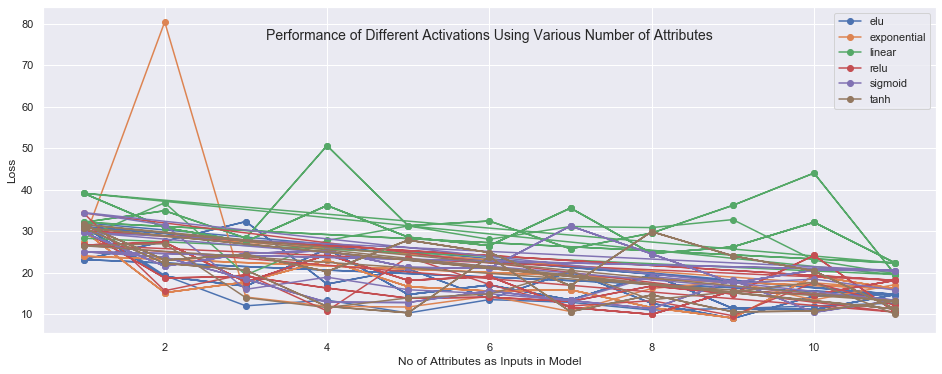

In [27]:
# Plot the actvations to see which performed best
plt.rcParams['figure.figsize'] = [16, 6]
groups = df.groupby('activation')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=activation)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Activations Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

Text(0.5, 0.9, 'Performance of Different Optimiser Using Various Number of Attributes')

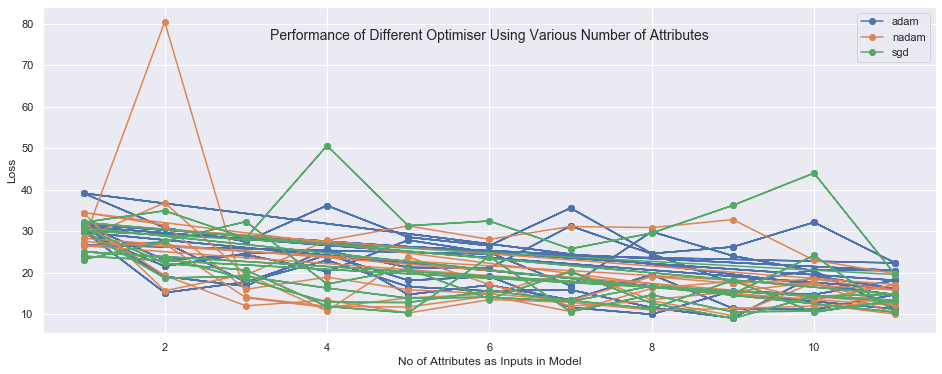

In [28]:
# Plot the actvations to see which performed best
plt.rcParams['figure.figsize'] = [16, 6]
groups = df.groupby('optimiser')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for optimiser, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=optimiser)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Optimiser Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

In [29]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True)

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
316,9,True,0.3,elu,sgd,100,10,8.959424
184,9,True,0.3,elu,sgd,100,10,8.959424
41,9,True,0.3,exponential,adam,100,10,9.063955
107,9,True,0.3,exponential,adam,100,10,9.063955
239,9,True,0.3,exponential,adam,100,10,9.063955
338,9,True,0.3,relu,nadam,100,10,9.611564
73,8,True,0.3,relu,adam,100,10,9.946417
205,8,True,0.3,relu,adam,100,10,9.946417
7,8,True,0.3,relu,adam,100,10,9.946417
351,11,True,0.3,tanh,nadam,100,10,9.988252
